## ADVANCE REGRESSION ASSIGNMENT
- DHARINI P

In [1]:
# IMPORTING REQUIRED LIBRARIES
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline    

#supress warnings
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

#train test split & scaling
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#modelling
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score

In [2]:
#READING DATASET
df_house = pd.read_csv('train.csv') 

### DATA INSPECTION

In [3]:
print(df_house.shape)
df_house.head()

(1460, 81)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
df_house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

##### There are missing data in the data
##### The dataset has 43 object columns & 38 numeric columns

In [5]:
# checking columns in the dataset
df_house.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
  

In [6]:
#summary of the dataset
df_house.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


##### Looking at the statistics, its clear that there are missing values and outliers in the data, which we will treat subsequently. 

### DATA CLEANING

In [7]:
# LEts take a loot the remaining columns which has missing values
null = df_house.isnull().sum().sort_values(ascending=False)
percent = round(((df_house.isnull().sum()/len(df_house.index))*100),2).sort_values(ascending=False)
missing_data = pd.concat([null,percent], axis=1, keys=['Null', 'Percent'])

In [8]:
col= percent[percent.values > 0.00]
print(len(col.index))
col

19


PoolQC          99.52
MiscFeature     96.30
Alley           93.77
Fence           80.75
FireplaceQu     47.26
LotFrontage     17.74
GarageCond       5.55
GarageType       5.55
GarageYrBlt      5.55
GarageFinish     5.55
GarageQual       5.55
BsmtExposure     2.60
BsmtFinType2     2.60
BsmtFinType1     2.53
BsmtCond         2.53
BsmtQual         2.53
MasVnrArea       0.55
MasVnrType       0.55
Electrical       0.07
dtype: float64

In [9]:
#Checking for null values 
null = df_house.isnull().sum().sort_values(ascending=False)
null

PoolQC           1453
MiscFeature      1406
Alley            1369
Fence            1179
FireplaceQu       690
LotFrontage       259
GarageCond         81
GarageType         81
GarageYrBlt        81
GarageFinish       81
GarageQual         81
BsmtExposure       38
BsmtFinType2       38
BsmtFinType1       37
BsmtCond           37
BsmtQual           37
MasVnrArea          8
MasVnrType          8
Electrical          1
Utilities           0
YearRemodAdd        0
MSSubClass          0
Foundation          0
ExterCond           0
ExterQual           0
Exterior2nd         0
Exterior1st         0
RoofMatl            0
RoofStyle           0
YearBuilt           0
LotConfig           0
OverallCond         0
OverallQual         0
HouseStyle          0
BldgType            0
Condition2          0
BsmtFinSF1          0
MSZoning            0
LotArea             0
Street              0
Condition1          0
Neighborhood        0
LotShape            0
LandContour         0
LandSlope           0
SalePrice 

In [10]:
# Lets have a look at percentage and check for columns with highest missing values
#Getting Percentage values
percent = round(((df_house.isnull().sum()/len(df_house.index))*100),2).sort_values(ascending=False)
missing_data = pd.concat([null,percent], axis=1, keys=['Null', 'Percent'])
missing_data.head(25)

,Null,Percent
PoolQC,1453,99.52
MiscFeature,1406,96.30
Alley,1369,93.77
Fence,1179,80.75
FireplaceQu,690,47.26
LotFrontage,259,17.74
GarageCond,81,5.55
GarageType,81,5.55
GarageYrBlt,81,5.55
GarageFinish,81,5.55


##### From the baove table, we can understand that there are 19 columns with missing values
   - 5 columns have missing values more than 45% -  this can be deleted as it will not give any inference
   - 1 column more than 15%
   - 10 columns between 1% to 6%
   - 3 columns less than 1%
##### Lets treat them one by one

In [11]:
# Dropping columns with missing values more than 45%
col=percent[percent.values > 45]
print(df_house.size)
df_house.drop(columns = list(col.index),inplace=True)
df_house.shape

118260


(1460, 76)

In [12]:
# LotFrontage is the Linear feet of street connected to property
# As it has more than 15%of null values, we can drop it
df_house.drop("LotFrontage", axis=1, inplace=True)

In [13]:
# LEts take a look the remaining columns which has missing values
null = df_house.isnull().sum().sort_values(ascending=False)
percent = round(((df_house.isnull().sum()/len(df_house.index))*100),2).sort_values(ascending=False)
missing_data = pd.concat([null,percent], axis=1, keys=['Null', 'Percent'])
missing_data.head()

,Null,Percent
GarageType,81,5.55
GarageYrBlt,81,5.55
GarageFinish,81,5.55
GarageCond,81,5.55
GarageQual,81,5.55


In [14]:
col= percent[percent.values > 0.00]
print(len(col.index))
col

13


GarageType      5.55
GarageYrBlt     5.55
GarageFinish    5.55
GarageCond      5.55
GarageQual      5.55
BsmtExposure    2.60
BsmtFinType2    2.60
BsmtFinType1    2.53
BsmtCond        2.53
BsmtQual        2.53
MasVnrType      0.55
MasVnrArea      0.55
Electrical      0.07
dtype: float64

In [15]:
#As per data definition file in the prob stmt, NA means No basement for the below columns related to basement
#Hence Missing values in Below columns related to basement are replaced with NoBasement 
df_house['BsmtFinType2'].fillna("NoBasement",inplace=True)
df_house['BsmtFinType1'].fillna("NoBasement",inplace=True)
df_house['BsmtCond'].fillna("NoBasement",inplace=True)
df_house['BsmtQual'].fillna("NoBasement",inplace=True)
df_house['BsmtExposure'].fillna("NoBasement",inplace=True)

In [16]:
#As per data definition file in the prob stmt, NA means No garage for the below columns related to garage
#Hence Missing values in Below columns related to garage are replaced with no garage 
df_house['GarageType'].fillna("NoGarage",inplace=True)
df_house['GarageFinish'].fillna("NoGarage",inplace=True)
df_house['GarageQual'].fillna("NoGarage",inplace=True)
df_house['GarageCond'].fillna("NoGarage",inplace=True)

In [17]:
# LEts take a loot the remaining columns which has missing values
null = df_house.isnull().sum().sort_values(ascending=False)
percent = round(((df_house.isnull().sum()/len(df_house.index))*100),2).sort_values(ascending=False)
missing_data = pd.concat([null,percent], axis=1, keys=['Null', 'Percent'])
missing_data.head()

,Null,Percent
GarageYrBlt,81,5.55
MasVnrType,8,0.55
MasVnrArea,8,0.55
Electrical,1,0.07
ExterCond,0,0.00


In [18]:
df_house['Electrical'].value_counts()

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

In [19]:
# WHen there is no garage, year of garage built will not be applicable. Hence replacing the same with 0
df_house['GarageYrBlt'].fillna(0,inplace=True)
# Masonry veneer type is none for NA as per data definition file
df_house['MasVnrType'].fillna('None',inplace=True)
# WHen there is no type of masanry veneer, masonry veneer area will not be applicable. Hence replacing the same with 0
df_house['MasVnrArea'].fillna(0,inplace=True)
#As electrical system column has only 1 null value, replacing it mode value, which is 'SBrkr'
df_house['Electrical'].fillna('SBrkr',inplace=True)

In [20]:
# LEts take a loot the remaining columns which has missing values
null = df_house.isnull().sum().sort_values(ascending=False)
percent = round(((df_house.isnull().sum()/len(df_house.index))*100),2).sort_values(ascending=False)
missing_data = pd.concat([null,percent], axis=1, keys=['Null', 'Percent'])
missing_data.head()

,Null,Percent
SalePrice,0,0.0
YearRemodAdd,0,0.0
RoofMatl,0,0.0
Exterior1st,0,0.0
Exterior2nd,0,0.0


In [21]:
df_house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 75 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotArea          1460 non-null int64
Street           1460 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-null object
Exterior2nd      1460 non-null object
MasVnrType       1460 non-

#### ALL THE MISSING VALUES HAVE BEEN TREATED.

#### Variable categorisation

In [22]:
## Variable categorisation
# identifying numeric and categorical variables
df_house.dtypes.value_counts()

object     38
int64      35
float64     2
dtype: int64

In [23]:
print('CATEGORICAL VARIABLES - object datatype:\n')
print(list(df_house.select_dtypes('object').columns))
print('\n')
print('NUMERIC VARIABLES:')
print(list(df_house.select_dtypes(exclude=['object'])))

CATEGORICAL VARIABLES - object datatype:

['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition']


NUMERIC VARIABLES:
['Id', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPo

-  All variables seems to be classified correctly.Age of the building can be derived from year columns

#### Check for duplicates

In [24]:
## Cheking for Duplicates
df_house[df_house.duplicated(keep='last')]

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice


#### There are no Duplicates

### EDA & OUTLIER TREATMENT

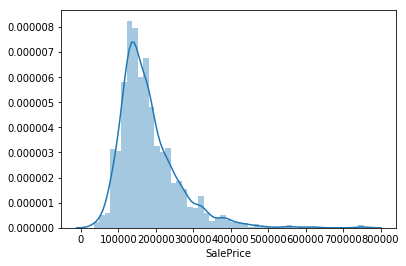

In [25]:
#Lets first check the distribution of the target variable "SalePrice"
sns.distplot(df_house.SalePrice)

- Its evident that there is skewness and the salesprice is not normally distributed
- Lets treat the same by doing log transformationm

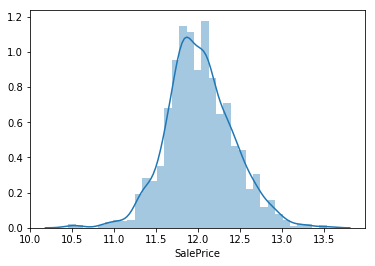

In [26]:
df_house['SalePrice'] = np.log(df_house['SalePrice'])
sns.distplot(df_house.SalePrice)

In [27]:
# Id column does not add any value.We can drop the same
df_house.drop('Id', axis=1, inplace=True)

In [28]:
# Lets check for correlation between the variables
df_house_cor = df_house.corr()

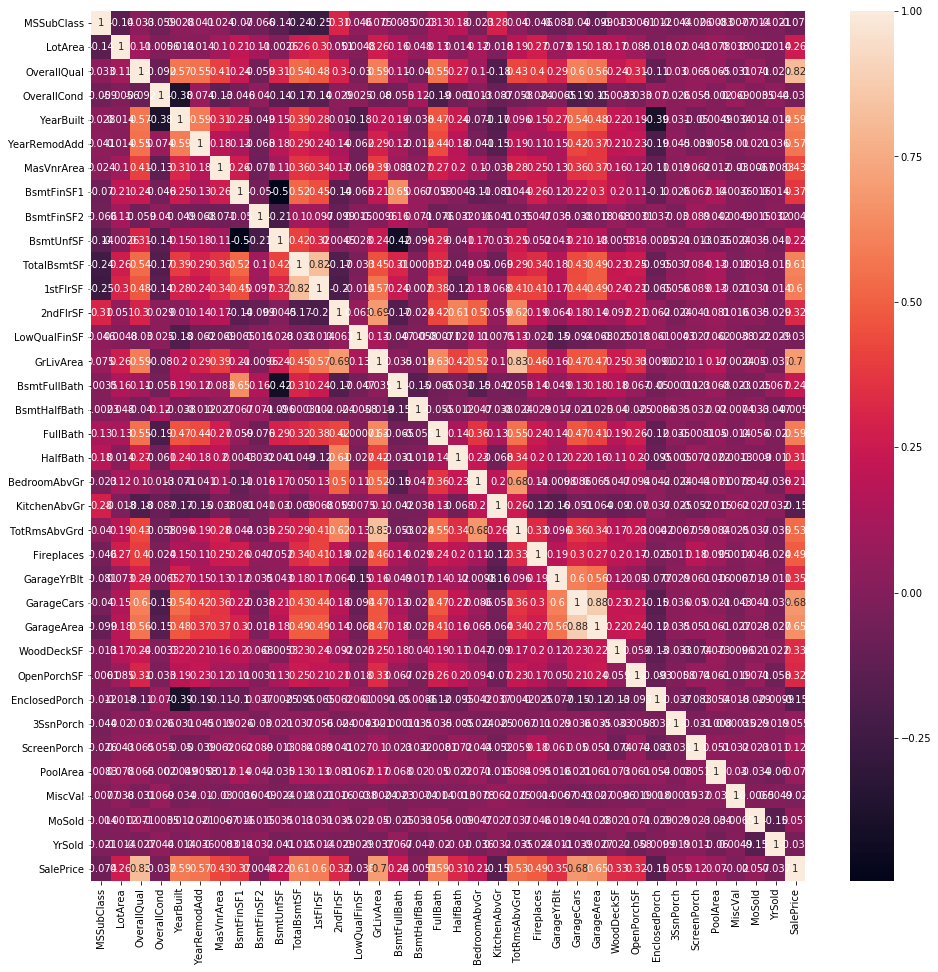

In [29]:
plt.figure(figsize=(16,16))
sns.heatmap(df_house_cor,annot=True)

In [30]:
print(df_house_cor["SalePrice"].sort_values(ascending=False))

SalePrice        1.000000
OverallQual      0.817184
GrLivArea        0.700927
GarageCars       0.680625
GarageArea       0.650888
TotalBsmtSF      0.612134
1stFlrSF         0.596981
FullBath         0.594771
YearBuilt        0.586570
YearRemodAdd     0.565608
TotRmsAbvGrd     0.534422
Fireplaces       0.489449
MasVnrArea       0.426775
BsmtFinSF1       0.372023
GarageYrBlt      0.349014
WoodDeckSF       0.334135
OpenPorchSF      0.321053
2ndFlrSF         0.319300
HalfBath         0.313982
LotArea          0.257320
BsmtFullBath     0.236224
BsmtUnfSF        0.221985
BedroomAbvGr     0.209044
ScreenPorch      0.121208
PoolArea         0.069798
MoSold           0.057329
3SsnPorch        0.054900
BsmtFinSF2       0.004832
BsmtHalfBath    -0.005149
MiscVal         -0.020021
OverallCond     -0.036868
YrSold          -0.037263
LowQualFinSF    -0.037963
MSSubClass      -0.073959
KitchenAbvGr    -0.147548
EnclosedPorch   -0.149050
Name: SalePrice, dtype: float64


- From the heatmap,we can infer the following
     - OverallQual(0.80) & GrLivArea(0.72) have high positive correlation with SalePrice
     - GarageCars(0.69),GarageArea(0.66), TotalBsmtSF(0.63),YearBuilt(0.62),FullBath(0.60),1stFlrSF(0.60) have moderate positive correlation with target variable
     - YrSold(-0.03), MSSubClass(-0.06) & OverallCond(-0.10) has low negative correlation with target variable
     - Others have low correlation with target variable

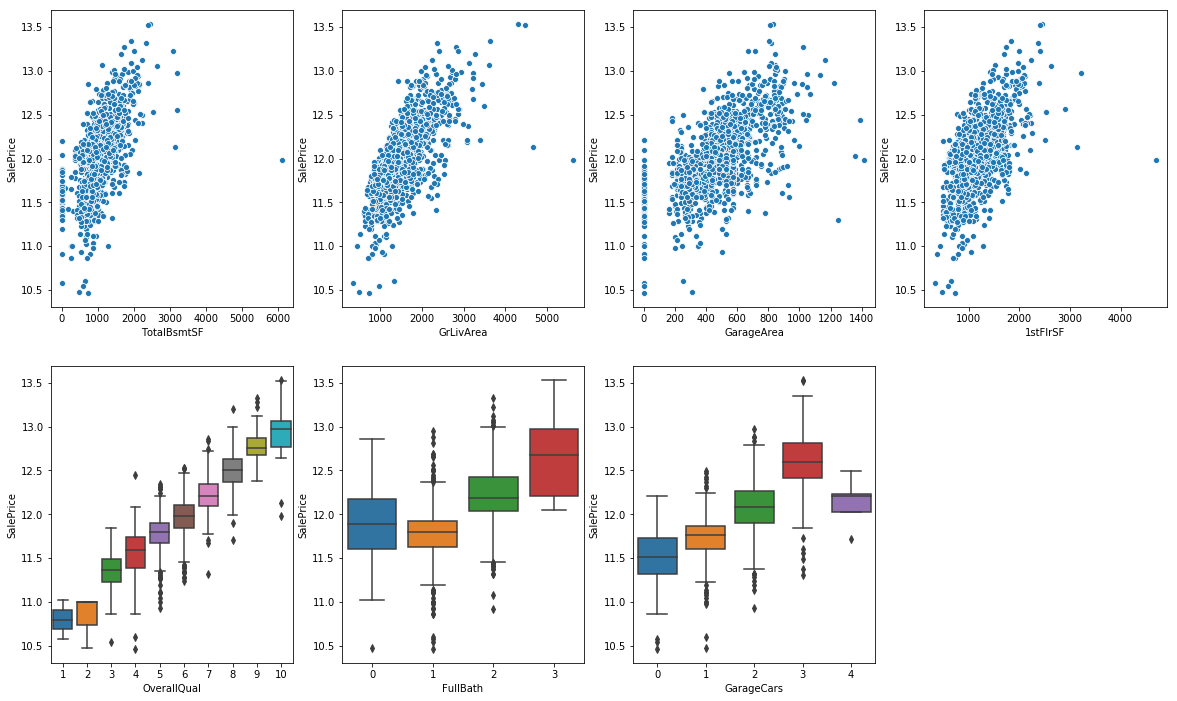

In [31]:
# Lets compare the correlated features with target variable
plt.figure(figsize=(20, 12))
plt.subplot(2,4,1)
sns.scatterplot(x = 'TotalBsmtSF',y='SalePrice', data = df_house)
plt.subplot(2,4,2)
sns.scatterplot(x = 'GrLivArea',y='SalePrice', data = df_house)
plt.subplot(2,4,3)
sns.scatterplot(x = 'GarageArea',y='SalePrice', data = df_house)
plt.subplot(2,4,4)
sns.scatterplot(x = '1stFlrSF',y='SalePrice', data = df_house)
plt.subplot(2,4,5)
sns.boxplot(x = 'OverallQual',y='SalePrice', data = df_house)
plt.subplot(2,4,6)
sns.boxplot(x = 'FullBath',y='SalePrice', data = df_house)
plt.subplot(2,4,7)
sns.boxplot(x = 'GarageCars',y='SalePrice', data = df_house)
plt.show()

In [32]:
num_cols = list(df_house.select_dtypes(exclude=['object']).columns)
print(len(num_cols))
num_cols

36


['MSSubClass',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice']

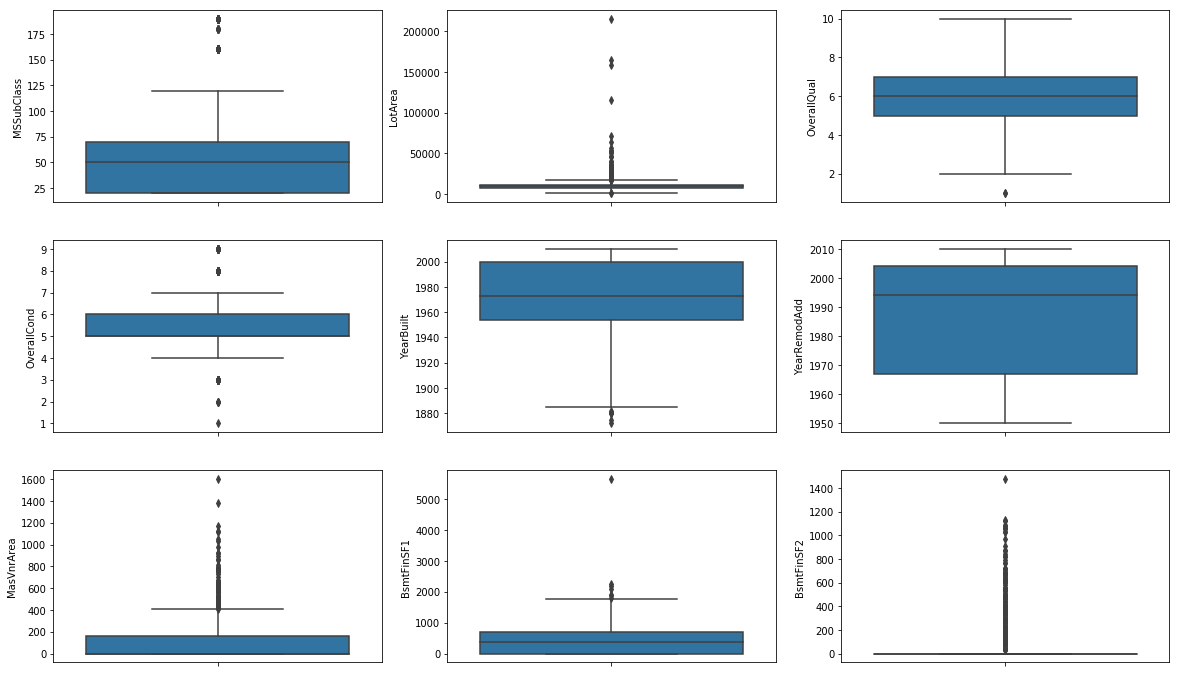

In [33]:
# Lets visualise the spread of numeric variable in the dataset
plt.figure(figsize=(20, 12))
plt.subplot(3,3,1)
sns.boxplot(y = 'MSSubClass', data = df_house)
plt.subplot(3,3,2)
sns.boxplot(y = 'LotArea', data = df_house)
plt.subplot(3,3,3)
sns.boxplot(y = 'OverallQual', data = df_house)
plt.subplot(3,3,4)
sns.boxplot(y = 'OverallCond', data = df_house)
plt.subplot(3,3,5)
sns.boxplot(y = 'YearBuilt', data = df_house)
plt.subplot(3,3,6)
sns.boxplot(y = 'YearRemodAdd', data = df_house)
plt.subplot(3,3,7)
sns.boxplot(y = 'MasVnrArea', data = df_house)
plt.subplot(3,3,8)
sns.boxplot(y = 'BsmtFinSF1', data = df_house)
plt.subplot(3,3,9)
sns.boxplot(y = 'BsmtFinSF2', data = df_house)
plt.show()

In [34]:
df_house['BsmtFinSF2'].value_counts()

0       1293
180        5
374        3
551        2
93         2
468        2
147        2
480        2
539        2
712        2
117        2
279        2
96         2
391        2
287        2
290        2
294        2
64         2
41         2
182        2
469        2
228        1
208        1
210        1
211        1
202        1
215        1
193        1
219        1
184        1
258        1
230        1
232        1
239        1
240        1
264        1
273        1
276        1
306        1
311        1
324        1
334        1
181        1
1085       1
1120       1
125        1
28         1
32         1
35         1
40         1
68         1
80         1
81         1
105        1
106        1
108        1
110        1
119        1
121        1
123        1
127        1
177        1
128        1
132        1
139        1
144        1
149        1
150        1
163        1
165        1
168        1
169        1
173        1
174        1
344        1
175        1
336        1

In [35]:
#Dropping the column 'BsmtFinSF2' as more than 80% values is 0
df_house.drop('BsmtFinSF2', axis=1, inplace=True)

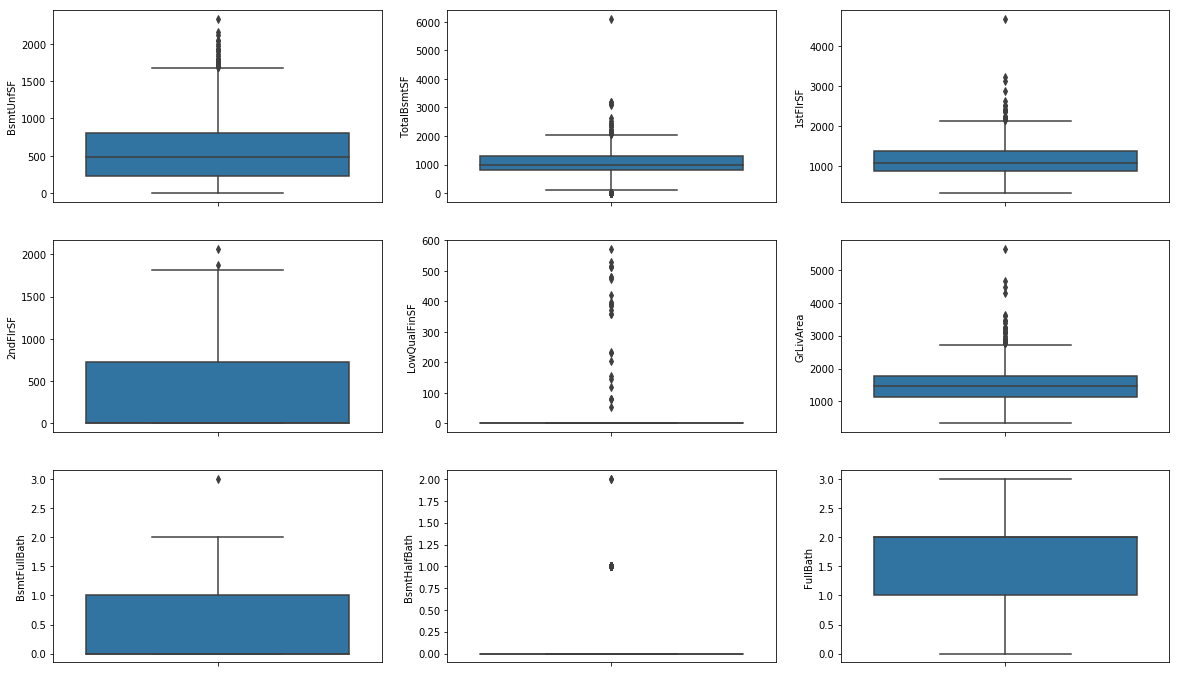

In [36]:
# Lets visualise the spread of numeric variable in the dataset
plt.figure(figsize=(20, 12))
plt.subplot(3,3,1)
sns.boxplot(y = 'BsmtUnfSF', data = df_house)
plt.subplot(3,3,2)
sns.boxplot(y = 'TotalBsmtSF', data = df_house)
plt.subplot(3,3,3)
sns.boxplot(y = '1stFlrSF', data = df_house)
plt.subplot(3,3,4)
sns.boxplot(y = '2ndFlrSF', data = df_house)
plt.subplot(3,3,5)
sns.boxplot(y = 'LowQualFinSF', data = df_house)
plt.subplot(3,3,6)
sns.boxplot(y = 'GrLivArea', data = df_house)
plt.subplot(3,3,7)
sns.boxplot(y = 'BsmtFullBath', data = df_house)
plt.subplot(3,3,8)
sns.boxplot(y = 'BsmtHalfBath', data = df_house)
plt.subplot(3,3,9)
sns.boxplot(y = 'FullBath', data = df_house)
plt.show()

In [37]:
print(df_house['LowQualFinSF'].value_counts())
print(df_house['BsmtHalfBath'].value_counts())

0      1434
80        3
360       2
528       1
53        1
120       1
144       1
156       1
205       1
232       1
234       1
371       1
572       1
390       1
392       1
397       1
420       1
473       1
479       1
481       1
513       1
514       1
515       1
384       1
Name: LowQualFinSF, dtype: int64
0    1378
1      80
2       2
Name: BsmtHalfBath, dtype: int64


In [38]:
#As more than 80% values for the features 'LowQualFinSF' & 'BsmtHalfBath' is 0, dropping as it wont add any value to analysis
df_house.drop('LowQualFinSF', axis=1, inplace=True)
df_house.drop('BsmtHalfBath', axis=1, inplace=True)

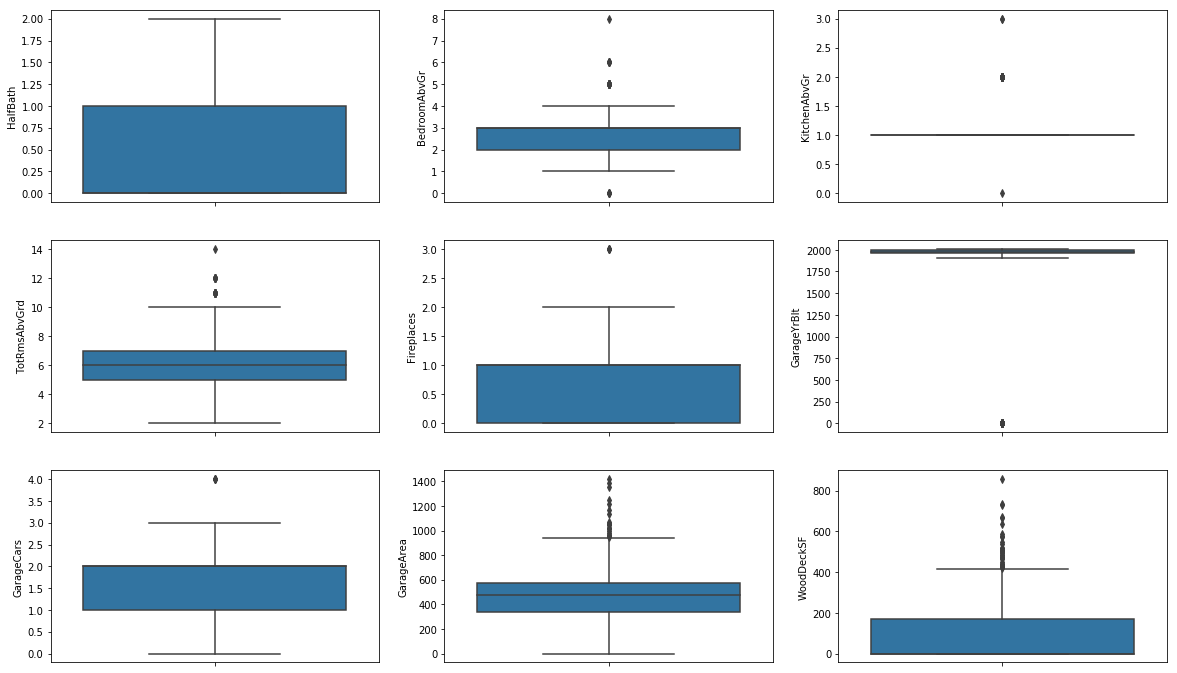

In [39]:
# Lets visualise the spread of numeric variable in the dataset
plt.figure(figsize=(20, 12))
plt.subplot(3,3,1)
sns.boxplot(y = 'HalfBath', data = df_house)
plt.subplot(3,3,2)
sns.boxplot(y = 'BedroomAbvGr', data = df_house)
plt.subplot(3,3,3)
sns.boxplot(y = 'KitchenAbvGr', data = df_house)
plt.subplot(3,3,4)
sns.boxplot(y = 'TotRmsAbvGrd', data = df_house)
plt.subplot(3,3,5)
sns.boxplot(y = 'Fireplaces', data = df_house)
plt.subplot(3,3,6)
sns.boxplot(y = 'GarageYrBlt', data = df_house)
plt.subplot(3,3,7)
sns.boxplot(y = 'GarageCars', data = df_house)
plt.subplot(3,3,8)
sns.boxplot(y = 'GarageArea', data = df_house)
plt.subplot(3,3,9)
sns.boxplot(y = 'WoodDeckSF', data = df_house)
plt.show()

In [40]:
print(df_house['KitchenAbvGr'].value_counts())

1    1392
2      65
3       2
0       1
Name: KitchenAbvGr, dtype: int64


In [41]:
#As more than 80% values for the features 'KitchenAbvGr' is 0, dropping as it wont add any value to analysis
df_house.drop('KitchenAbvGr', axis=1, inplace=True)

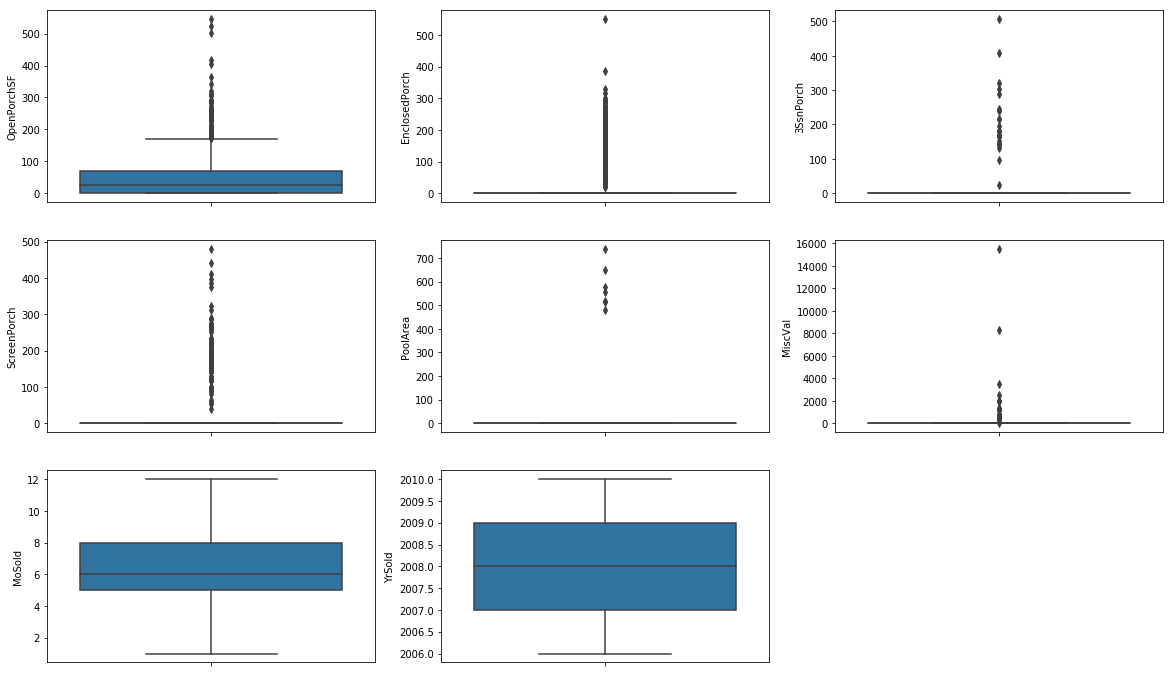

In [42]:
# Lets visualise the spread of numeric variable in the dataset
plt.figure(figsize=(20, 12))
plt.subplot(3,3,1)
sns.boxplot(y = 'OpenPorchSF', data = df_house)
plt.subplot(3,3,2)
sns.boxplot(y = 'EnclosedPorch', data = df_house)
plt.subplot(3,3,3)
sns.boxplot(y = '3SsnPorch', data = df_house)
plt.subplot(3,3,4)
sns.boxplot(y = 'ScreenPorch', data = df_house)
plt.subplot(3,3,5)
sns.boxplot(y = 'PoolArea', data = df_house)
plt.subplot(3,3,6)
sns.boxplot(y = 'MiscVal', data = df_house)
plt.subplot(3,3,7)
sns.boxplot(y = 'MoSold', data = df_house)
plt.subplot(3,3,8)
sns.boxplot(y = 'YrSold', data = df_house)
plt.show()

In [43]:
print(df_house['EnclosedPorch'].value_counts())
print(df_house['3SsnPorch'].value_counts())
print(df_house['ScreenPorch'].value_counts())
print(df_house['PoolArea'].value_counts())
print(df_house['MiscVal'].value_counts())

0      1252
112      15
96        6
120       5
144       5
192       5
216       5
252       4
116       4
156       4
126       3
228       3
128       3
184       3
102       3
150       3
40        3
176       3
164       3
77        2
185       2
80        2
180       2
84        2
160       2
168       2
205       2
158       2
154       2
100       2
108       2
137       2
114       2
115       2
202       2
190       2
234       2
244       2
36        2
240       2
34        2
39        2
224       2
32        2
264       2
236       2
30        1
105       1
94        1
24        1
99        1
98        1
318       1
20        1
301       1
330       1
19        1
56        1
54        1
37        1
60        1
64        1
67        1
68        1
70        1
294       1
52        1
50        1
48        1
44        1
42        1
81        1
87        1
90        1
91        1
275       1
293       1
123       1
221       1
200       1
208       1
210       1
212       1
214 

In [44]:
# As the below columns have more than 80% values as 0, drpping the columns as it wont give any infwerence in the analysis
df_house.drop('EnclosedPorch', axis=1, inplace=True)
df_house.drop('3SsnPorch', axis=1, inplace=True)
df_house.drop('ScreenPorch', axis=1, inplace=True)
df_house.drop('PoolArea', axis=1, inplace=True)
df_house.drop('MiscVal', axis=1, inplace=True)

##### TREATING THE OTHER COLUMNS FOR 0UTLIERS.
   - As removing outlliers will cause data loss, imputinh the outliers with floor and cap values
   - Taking 95% and 5% percentile as cap and floor for each column

In [45]:
num_cols = list(df_house.select_dtypes(exclude=['object']).columns)
for col in num_cols:
    percentiles = df_house[col].quantile([0.05,0.95]).values
    df_house[col][df_house[col] <= percentiles[0]] = percentiles[0]
    df_house[col][df_house[col] >= percentiles[1]] = percentiles[1]

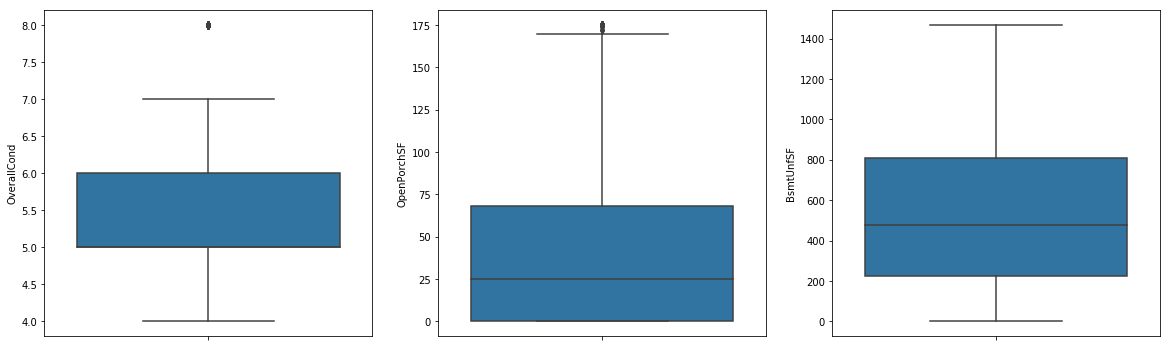

In [46]:
#Lets take a look at few columns to check if the outliers are treated
plt.figure(figsize=(20, 6))
plt.subplot(1,3,1)
sns.boxplot(y = 'OverallCond', data = df_house)
plt.subplot(1,3,2)
sns.boxplot(y = 'OpenPorchSF', data = df_house)
plt.subplot(1,3,3)
sns.boxplot(y = 'BsmtUnfSF', data = df_house)
plt.show()

#### outliers are treated. 

In [47]:
num_cols = list(df_house.select_dtypes(exclude=['object']).columns)
print(len(num_cols))
num_cols

27


['MSSubClass',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'GrLivArea',
 'BsmtFullBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'MoSold',
 'YrSold',
 'SalePrice']

#### CATEGORICAL VARIABLES:

In [48]:
cat_cols = list(df_house.select_dtypes(include=['object']).columns)
print(len(cat_cols))
cat_cols

38


['MSZoning',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'SaleType',
 'SaleCondition']

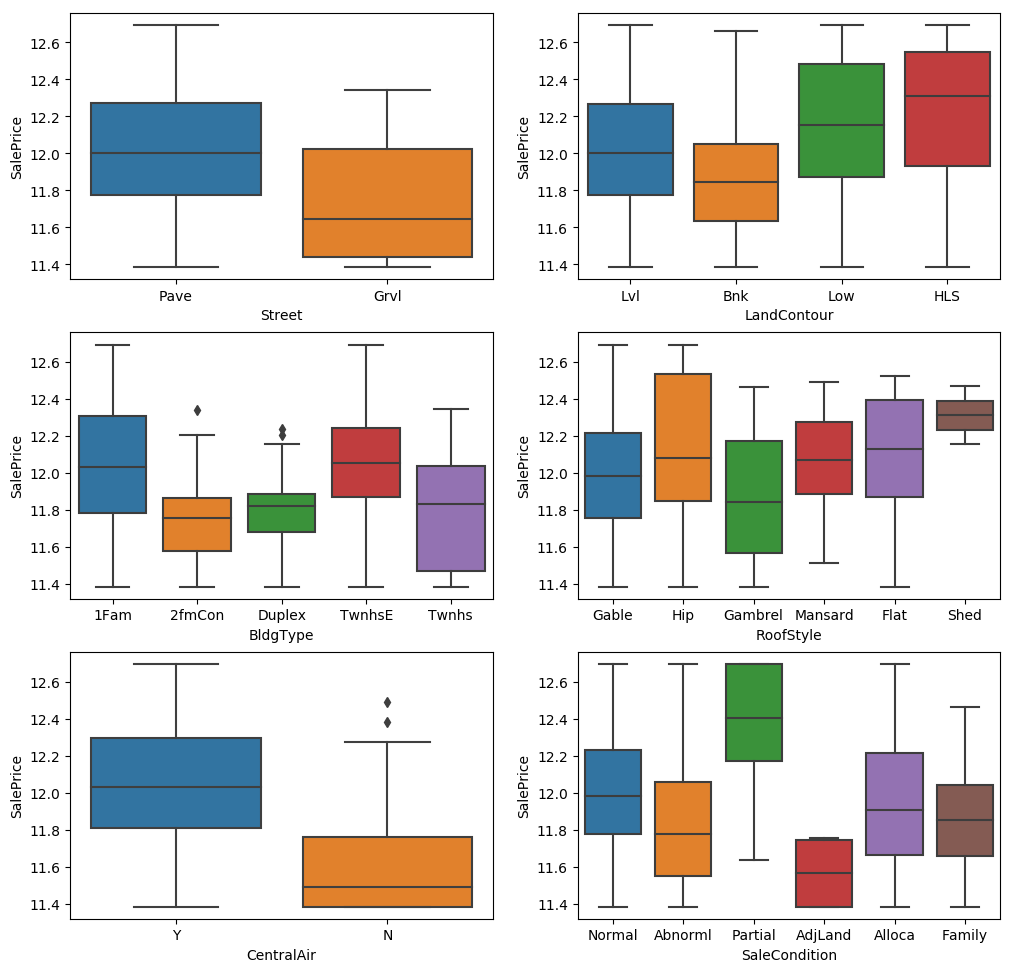

In [49]:
#Lets plot few categorical variables with our target variable
plt.figure(figsize=(12, 12),dpi=100)
plt.subplot(3,2,1)
sns.boxplot(x = 'Street', y = 'SalePrice', data = df_house)
plt.subplot(3,2,2)
sns.boxplot(x = 'LandContour', y = 'SalePrice', data = df_house)
plt.subplot(3,2,3)
sns.boxplot(x = 'BldgType', y = 'SalePrice', data = df_house)
plt.subplot(3,2,4)
sns.boxplot(x = 'RoofStyle', y = 'SalePrice', data = df_house)
plt.subplot(3,2,5)
sns.boxplot(x = 'CentralAir', y = 'SalePrice', data = df_house)
plt.subplot(3,2,6)
sns.boxplot(x = 'SaleCondition', y = 'SalePrice', data = df_house)
plt.show()

- We infer the following
    - Houses with paved street are valued high compared to gravel
    - Hill side and low lying houses are valued a notch higher than levelled and banked houses
    - Single familydetached houses are costlier than the rest while duplex and 2 amily converted houses are cheaper
    - Houses with Hip and shed roof style is valued higher.Other roof styles are valued on moderate price
    - Hpouse with air conditioning is costlier than the one with no AC
    - Partially completed homes are costlier, followed by normal sale and allocated properties

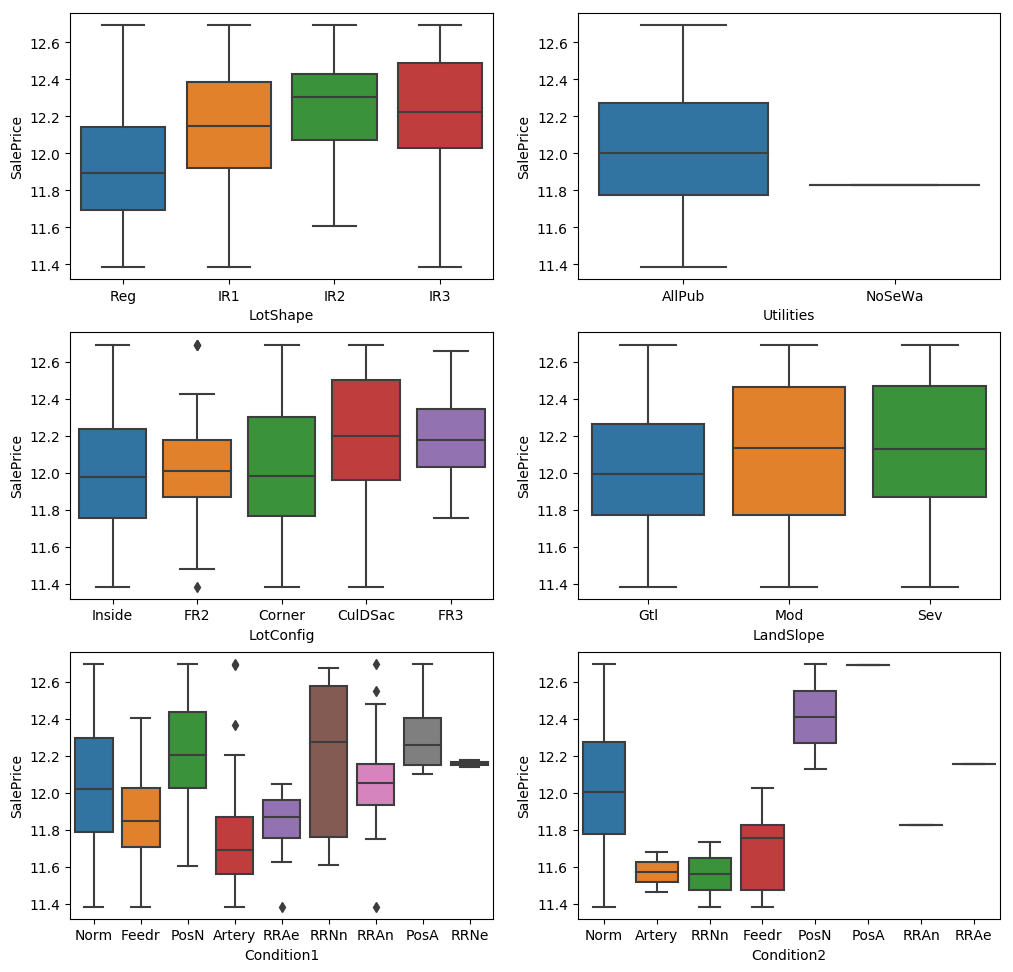

In [50]:
#Lets plot few categorical variables with our target variable
plt.figure(figsize=(12, 12),dpi=100)
plt.subplot(3,2,1)
sns.boxplot(x = 'LotShape', y = 'SalePrice', data = df_house)
plt.subplot(3,2,2)
sns.boxplot(x = 'Utilities', y = 'SalePrice', data = df_house)
plt.subplot(3,2,3)
sns.boxplot(x = 'LotConfig', y = 'SalePrice', data = df_house)
plt.subplot(3,2,4)
sns.boxplot(x = 'LandSlope', y = 'SalePrice', data = df_house)
plt.subplot(3,2,5)
sns.boxplot(x = 'Condition1', y = 'SalePrice', data = df_house)
plt.subplot(3,2,6)
sns.boxplot(x = 'Condition2', y = 'SalePrice', data = df_house)
plt.show()

- We infer the following
    - All type of lotshapes have average pricing
    - houses with all public utilities are valued higher than the rest
    - All kinds of lot configuration are valued on medium level
    - Moderate and severe landslope are rated more than the other
    - Condition with Posn - Near positive off-site feature--park, greenbelt, etc is valued higher than the rest

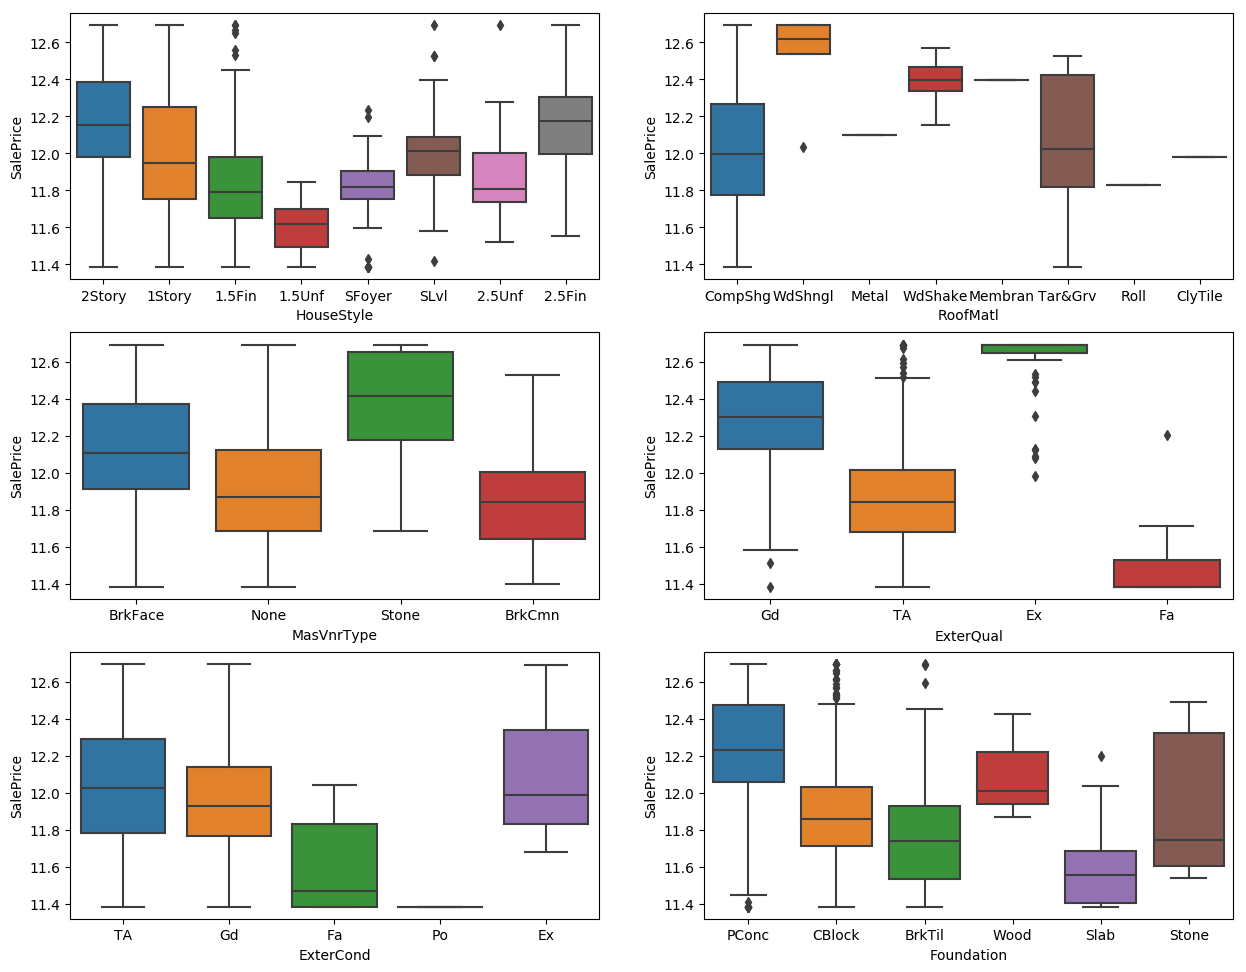

In [51]:
#Lets plot few categorical variables with our target variable
plt.figure(figsize=(15, 12),dpi=100)
plt.subplot(3,2,1)
sns.boxplot(x = 'HouseStyle', y = 'SalePrice', data = df_house)
plt.subplot(3,2,2)
sns.boxplot(x = 'RoofMatl', y = 'SalePrice', data = df_house)
plt.subplot(3,2,3)
sns.boxplot(x = 'MasVnrType', y = 'SalePrice', data = df_house)
plt.subplot(3,2,4)
sns.boxplot(x = 'ExterQual', y = 'SalePrice', data = df_house)
plt.subplot(3,2,5)
sns.boxplot(x = 'ExterCond', y = 'SalePrice', data = df_house)
plt.subplot(3,2,6)
sns.boxplot(x = 'Foundation', y = 'SalePrice', data = df_house)
plt.show()

- We infer the following
    - 2 storeyed houses are costlier than the others.1.5 unfinished are very cheap
    - Wood Shakes roof material is costly and metal is cheap
    - Stone mansonry houses price are on the higher side
    - Houses with excellent external quality & ecternal condition has higher price
    - Houses with concreet and stone foundation have higher prices

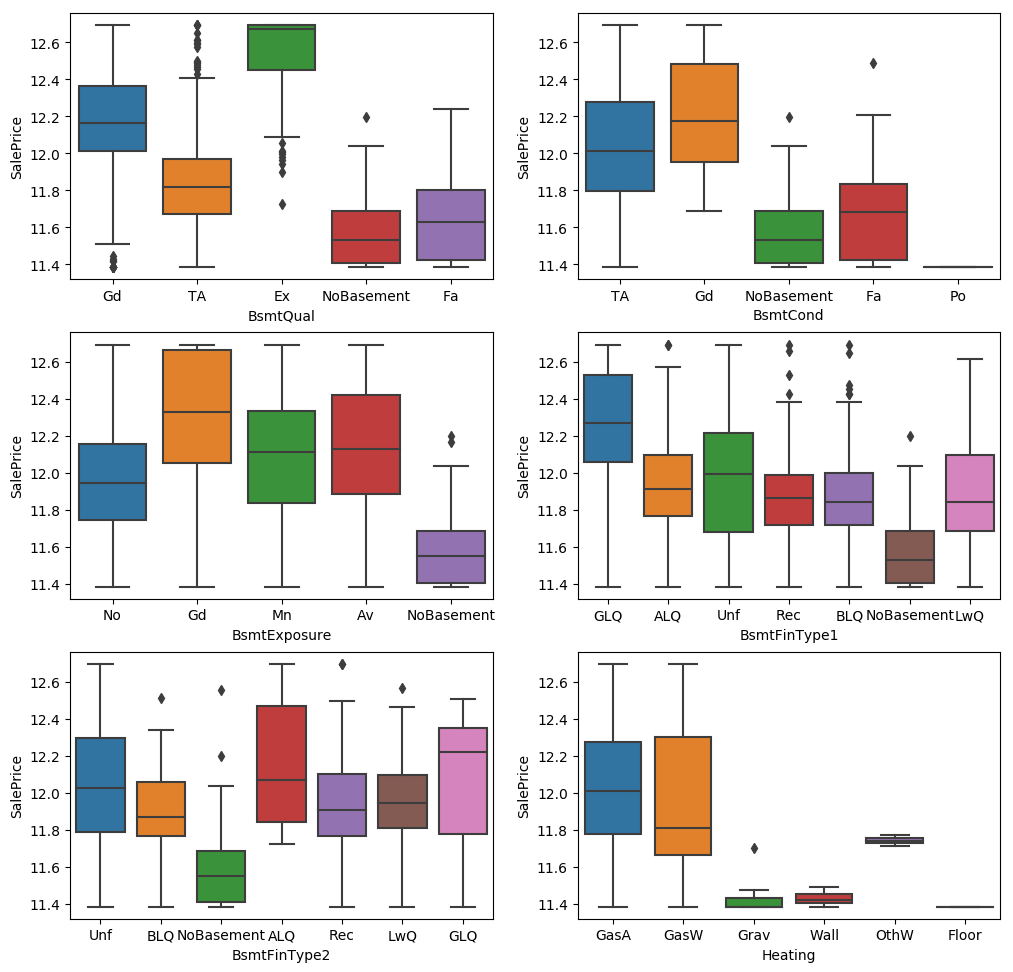

In [52]:
#Lets plot few categorical variables with our target variable
plt.figure(figsize=(12, 12),dpi=100)
plt.subplot(3,2,1)
sns.boxplot(x = 'BsmtQual', y = 'SalePrice', data = df_house)
plt.subplot(3,2,2)
sns.boxplot(x = 'BsmtCond', y = 'SalePrice', data = df_house)
plt.subplot(3,2,3)
sns.boxplot(x = 'BsmtExposure', y = 'SalePrice', data = df_house)
plt.subplot(3,2,4)
sns.boxplot(x = 'BsmtFinType1', y = 'SalePrice', data = df_house)
plt.subplot(3,2,5)
sns.boxplot(x = 'BsmtFinType2', y = 'SalePrice', data = df_house)
plt.subplot(3,2,6)
sns.boxplot(x = 'Heating', y = 'SalePrice', data = df_house)
plt.show()

- We infer the following
    - Houses with excellent external quality, good basement condition and basement exposure have higher price
    - BsmtFinType2 rated as Good Living Quarters has higher price
    - Prices of Houses with gas forced warm air furnace & Gas hot water or steam heat are on thenhigher end

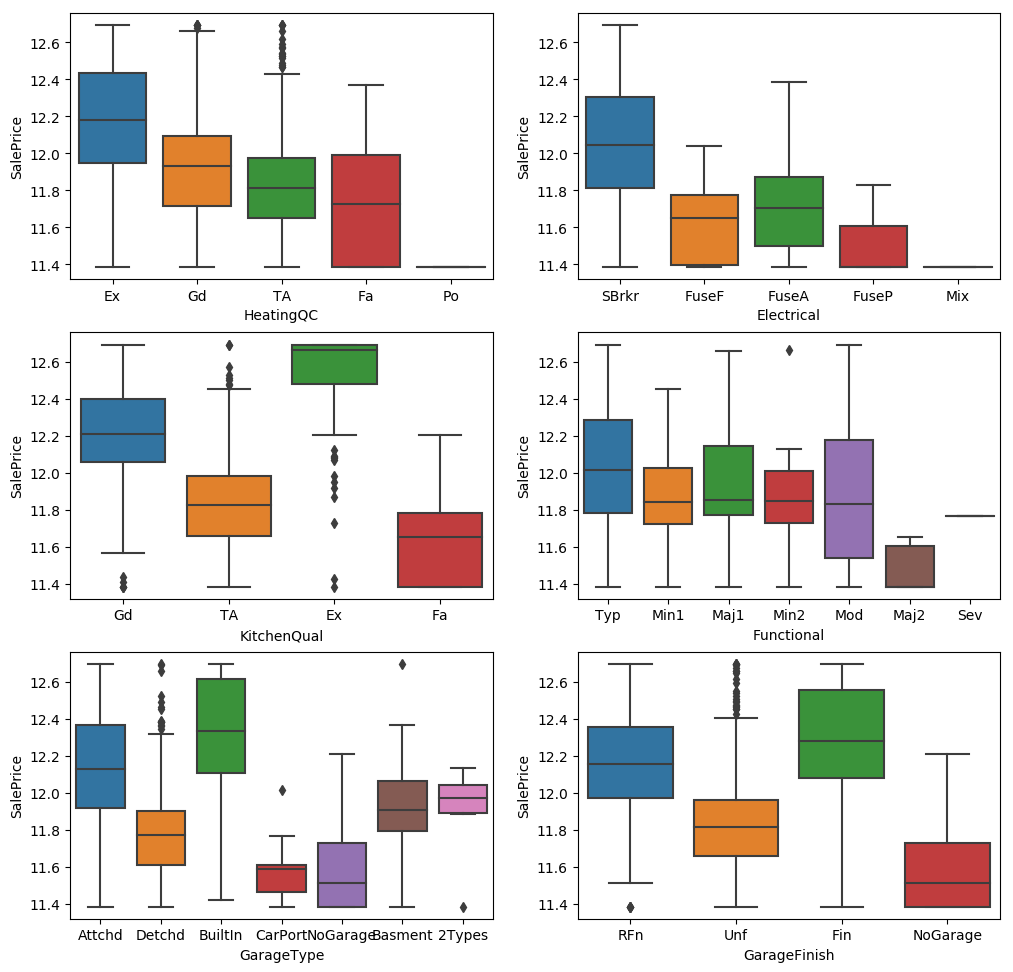

In [53]:
#Lets plot few categorical variables with our target variable
plt.figure(figsize=(12, 12),dpi=100)
plt.subplot(3,2,1)
sns.boxplot(x = 'HeatingQC', y = 'SalePrice', data = df_house)
plt.subplot(3,2,2)
sns.boxplot(x = 'Electrical', y = 'SalePrice', data = df_house)
plt.subplot(3,2,3)
sns.boxplot(x = 'KitchenQual', y = 'SalePrice', data = df_house)
plt.subplot(3,2,4)
sns.boxplot(x = 'Functional', y = 'SalePrice', data = df_house)
plt.subplot(3,2,5)
sns.boxplot(x = 'GarageType', y = 'SalePrice', data = df_house)
plt.subplot(3,2,6)
sns.boxplot(x = 'GarageFinish', y = 'SalePrice', data = df_house)
plt.show()

- We infer the following
    - Houses with excellent heating qc and kitchen quality have higher price
    - Houses having electrical system as Standard Circuit Breakers & Romex are costlier than the rest
    - Houses with builtin and finsihed garages are costlier and rated high

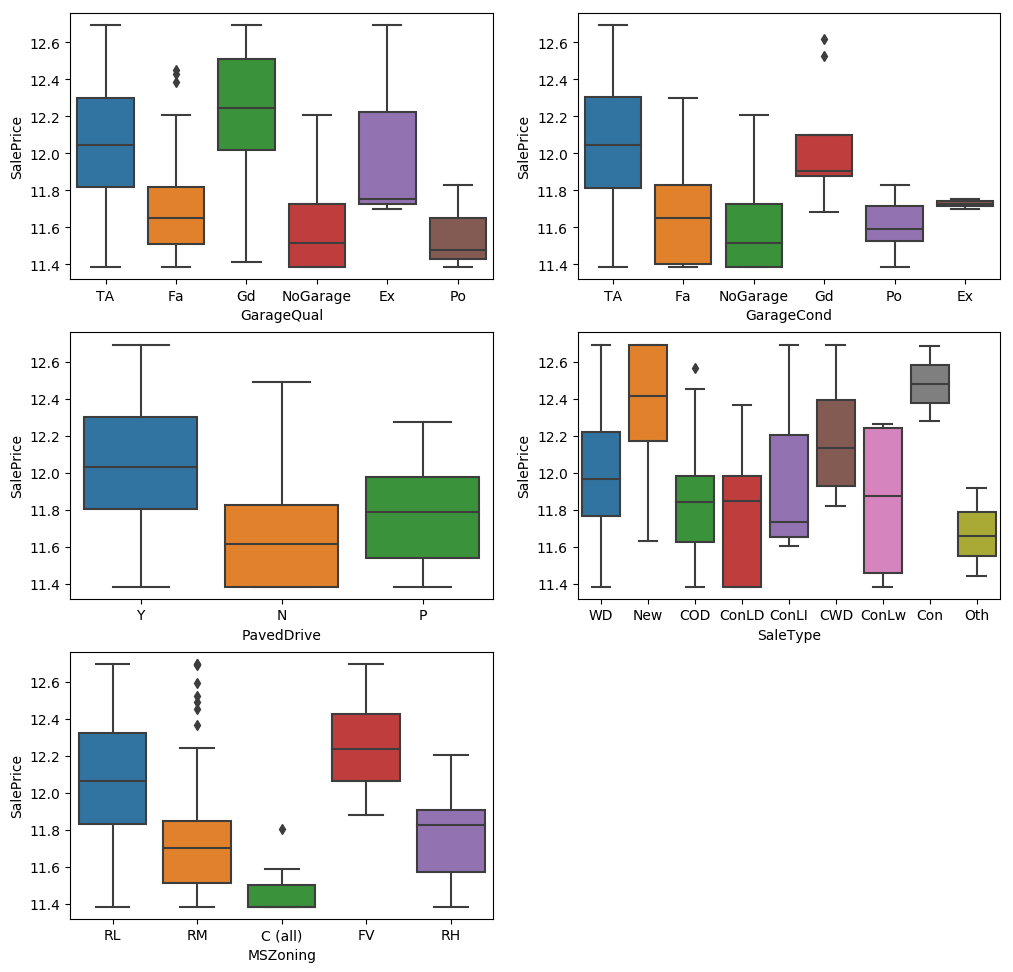

In [54]:
#Lets plot few categorical variables with our target variable
plt.figure(figsize=(12, 12),dpi=100)
plt.subplot(3,2,1)
sns.boxplot(x = 'GarageQual', y = 'SalePrice', data = df_house)
plt.subplot(3,2,2)
sns.boxplot(x = 'GarageCond', y = 'SalePrice', data = df_house)
plt.subplot(3,2,3)
sns.boxplot(x = 'PavedDrive', y = 'SalePrice', data = df_house)
plt.subplot(3,2,4)
sns.boxplot(x = 'SaleType', y = 'SalePrice', data = df_house)
plt.subplot(3,2,5)
sns.boxplot(x = 'MSZoning', y = 'SalePrice', data = df_house)
plt.show()

- We infer the following
    - Houses with excellent garage qualit and average garage condition  have higher price
    - Houses having epaved drive away are costlier than the rest
    - New houses are costlier and rated high
    - Houses with zoning classified as residential low density & floating village density are rated higher than the rest

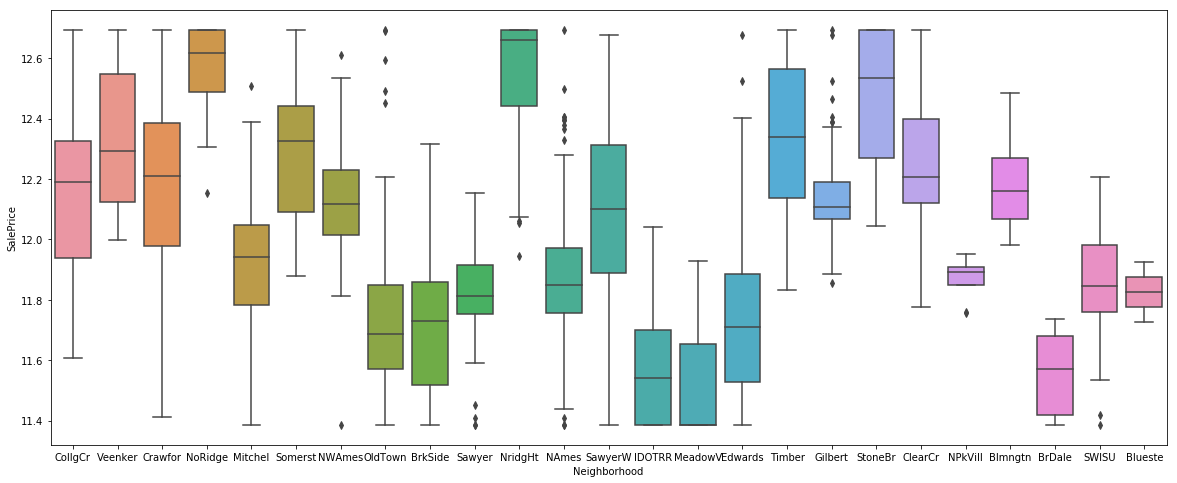

In [55]:
plt.figure(figsize=(20, 8))
sns.boxplot(x='Neighborhood', y="SalePrice",data=df_house)

- Houses with nighbrhood Northridge Heights & stone brook have higher proces

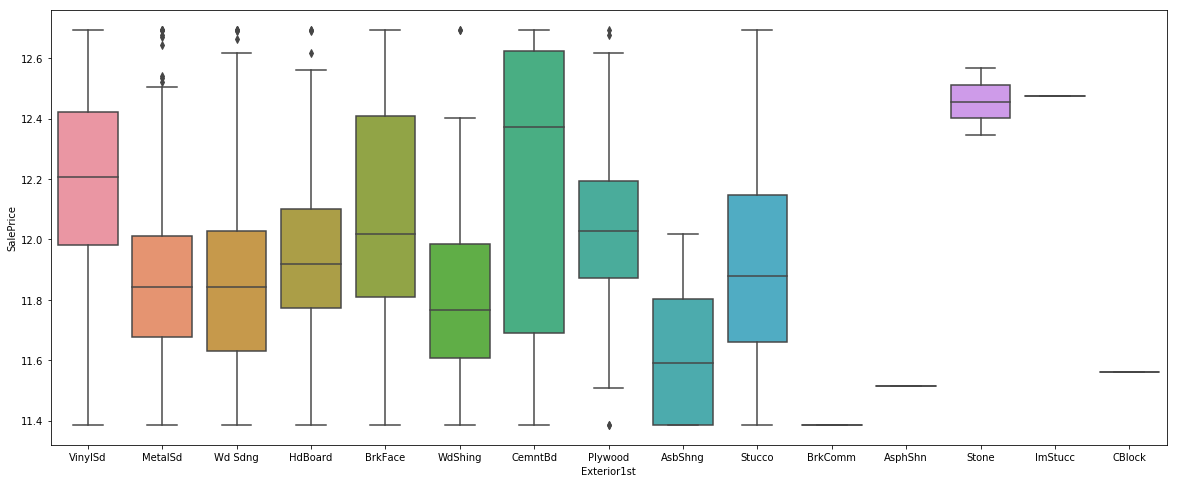

In [56]:
plt.figure(figsize=(20, 8))
sns.boxplot(x='Exterior1st', y="SalePrice",data=df_house)

- Most houses have exterior covering as cement board as it has thenhigest spread and its valued higher than the rest

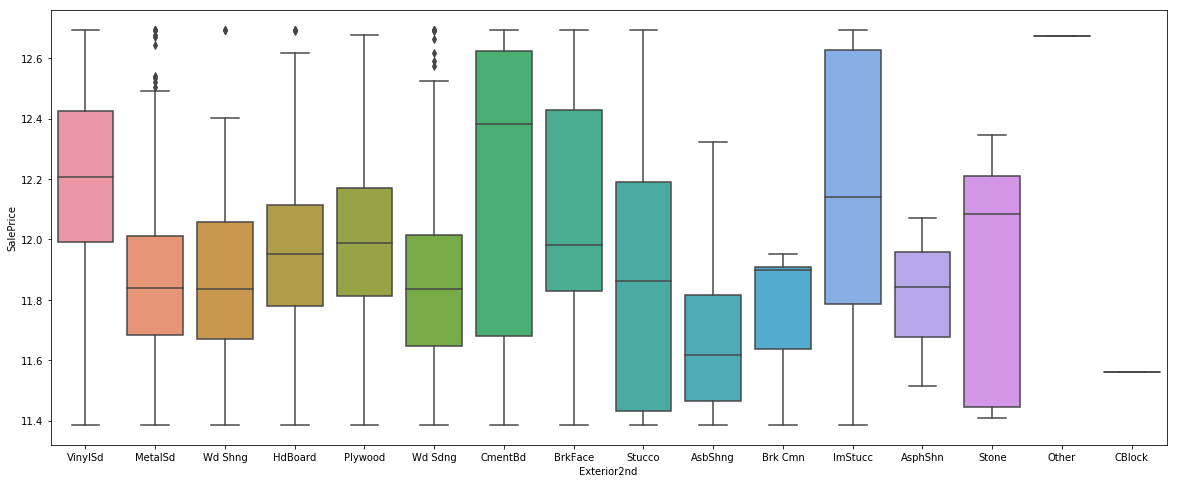

In [57]:
plt.figure(figsize=(20, 8))
sns.boxplot(x='Exterior2nd', y="SalePrice",data=df_house)

- Most houses have exterior covering as cement board as it has then higest spread and its valued higher than the rest, follwed by Imitation Stucco,Vinyl Siding

### DATA PREPARATION

- Looking at the data definition file, we can understand that there are ordered categorical variables. We can label encode the ordered categorical variables and create dummies for the others

##### LABEL ENCODING

In [58]:
# Import label encoder 
from sklearn import preprocessing 

le = preprocessing.LabelEncoder()

In [59]:
lab_enc = df_house[['LotShape','LandSlope','ExterQual', 'ExterCond','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1',
           'BsmtFinType2','HeatingQC','CentralAir',  'KitchenQual','GarageFinish','GarageQual','GarageCond']]
lab_enc.head(5)

,LotShape,LandSlope,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,HeatingQC,CentralAir,KitchenQual,GarageFinish,GarageQual,GarageCond
0,Reg,Gtl,Gd,TA,Gd,TA,No,GLQ,Unf,Ex,Y,Gd,RFn,TA,TA
1,Reg,Gtl,TA,TA,Gd,TA,Gd,ALQ,Unf,Ex,Y,TA,RFn,TA,TA
2,IR1,Gtl,Gd,TA,Gd,TA,Mn,GLQ,Unf,Ex,Y,Gd,RFn,TA,TA
3,IR1,Gtl,TA,TA,TA,Gd,No,ALQ,Unf,Gd,Y,Gd,Unf,TA,TA
4,IR1,Gtl,Gd,TA,Gd,TA,Av,GLQ,Unf,Ex,Y,Gd,RFn,TA,TA


In [60]:
for col in lab_enc.columns:
            df_house[col] = le.fit_transform(df_house[col])

In [61]:
lab_enc_after = df_house[['LotShape','LandSlope','ExterQual', 'ExterCond','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1',
           'BsmtFinType2','HeatingQC','CentralAir',  'KitchenQual','GarageFinish','GarageQual','GarageCond']]
lab_enc_after.head(5)

,LotShape,LandSlope,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,HeatingQC,CentralAir,KitchenQual,GarageFinish,GarageQual,GarageCond
0,3,0,2,4,2,4,3,2,6,0,1,2,2,5,5
1,3,0,3,4,2,4,1,0,6,0,1,3,2,5,5
2,0,0,2,4,2,4,2,2,6,0,1,2,2,5,5
3,0,0,3,4,4,1,3,0,6,2,1,2,3,5,5
4,0,0,2,4,2,4,0,2,6,0,1,2,2,5,5


##### DUMMY VARIABLES

In [62]:
cat_cols = list(df_house.select_dtypes(include=['object']).columns)
print(len(cat_cols))
cat_cols

23


['MSZoning',
 'Street',
 'LandContour',
 'Utilities',
 'LotConfig',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'Foundation',
 'Heating',
 'Electrical',
 'Functional',
 'GarageType',
 'PavedDrive',
 'SaleType',
 'SaleCondition']

In [63]:
df_cat = pd.get_dummies(df_house[cat_cols],drop_first=True)
df_house = pd.concat([df_house,df_cat],axis=1)
df_house.drop(cat_cols,axis=1,inplace=True)

In [64]:
df_house.head()

,MSSubClass,LotArea,LotShape,LandSlope,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,WoodDeckSF,OpenPorchSF,MoSold,YrSold,SalePrice,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NoGarage,PavedDrive_P,PavedDrive_Y,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,8450.0,3,0,7,5,2003,2003,196.0,2,4,2,4,3,2,706,6,150,856.0,0,1,856.0,854.0,1710.0,1,2,1,3,2,8,0,2003.0,2,2,548.0,5,5,0,61.0,2,2008,12.247694,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
1,20,9600.0,3,0,6,8,1976,1976,0.0,3,4,2,4,1,0,978,6,284,1262.0,0,1,1262.0,0.0,1262.0,0,2,0,3,3,6,1,1976.0,2,2,460.0,5,5,298,0.0,5,2007,12.109011,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
2,60,11250.0,0,0,7,5,2001,2002,162.0,2,4,2,4,2,2,486,6,434,920.0,0,1,920.

In [65]:
df_house.shape

(1460, 190)

In [66]:
cat_cols = list(df_house.select_dtypes(include=['object']).columns)
print(len(cat_cols))
print(df_house.shape)

0
(1460, 190)


##### Data preparation is done. There are no categorical features in our data

#### TRAIN-TEST SPLIT

In [67]:
df_train,df_test = train_test_split(df_house,train_size=0.7, test_size=0.3,random_state=42)

#### RESCALING THE FEATURES - using standard scaling

In [68]:
scaler = StandardScaler()

In [69]:
df_train.head()

,MSSubClass,LotArea,LotShape,LandSlope,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,WoodDeckSF,OpenPorchSF,MoSold,YrSold,SalePrice,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NoGarage,PavedDrive_P,PavedDrive_Y,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
135,20,10400.0,3,0,7,6,1970,1970,288.0,3,4,4,4,3,6,0,6,1304,1304.0,2,1,1682.00,0.0,1682.0,0,2,0,3,3,7,1,1970.0,3,2,530.0,5,5,98,0.00,5,2008,12.066811,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
1452,160,3675.0,3,0,5,5,2005,2005,80.0,3,4,2,4,1,2,547,6,0,547.0,2,1,1072.00,0.0,1072.0,1,1,0,2,3,5,0,2005.0,0,2,525.0,5,5,0,28.00,5,2006,11.884489,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
762,60,8640.0,3,0,7,5,2007,2007,0.0,3,4,2,4,2,2,24,6,732,756.0,0,1

In [70]:
columns = list(df_train.columns)

In [71]:
len(num_cols)

27

In [72]:
#Scaling train dataset
df_train[columns] = scaler.fit_transform(df_train[columns])

In [73]:
df_train.head()

,MSSubClass,LotArea,LotShape,LandSlope,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,WoodDeckSF,OpenPorchSF,MoSold,YrSold,SalePrice,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NoGarage,PavedDrive_P,PavedDrive_Y,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
135,-0.897455,0.185706,0.765292,-0.231319,0.739257,0.422244,-0.052832,-0.709963,1.350581,0.660651,0.36638,1.009924,0.334118,0.591420,1.281955,-1.059513,0.332052,1.775633,0.711407,0.273978,0.281569,1.572265,-0.824309,0.381226,-0.835964,0.884223,-0.766726,0.144165,0.802515,0.312426,0.607162,0.216592,0.942773,0.300246,0.287809,0.31271,0.295322,0.063753,-0.827854,-0.538984,0.141155,0.111583,-0.209684,-0.113564,0.516478,-0.423065,0.062715,-0.17399,-0.155152,0.318437,-0.031311,-0.281569,-0.188406,-0.054286,0.663367,-0.031311,-0.109055,-0.20454,-0.137703,-0.345713,-0.196614,-0.289593,-0.231654,-0.155152,-0.099454,-0.185601,-0.423065,-0.076885,4.231714,-0.167921,-0.226921,-0.295511,-0.126176,-0.222108,-0.196614,-0.243164,-0.141351,-0.164812,-0.088867,-0.243164,0.405211,-0.076885,-0.117910,-0.094304,-0.126176,-0.031311,-0.070152,-0.054286,0.094304,0.0,-0.044302,-0.031311,-0.031311,0.0,-0.155152,-0.191176,-0.170979,-0.289593,-0.10436,1.010832,-0.083086

In [74]:
print(df_train.shape)

(1021, 190)


#### Dividing data into X and y sets for model building 

In [75]:
#Splitting train dataset into X & y
y_train = df_train.pop('SalePrice')
X_train = df_train

### Model Building
- Modelling with RFE & Without RFE.
- First il run the model withOUT RFE and then with RFE. 
- I will consider the model that gives the best results as the final model

### MODEL WITHOUT RFE
   - As there are 190 columns, performing ridge and lasso will be tedious and computationally intensice. LEts first use RFE and select and select top 75 features

### RIDGE REGRESSION

In [76]:
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100,200,300,400, 500, 1000]}


ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 31 candidates, totalling 155 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 155 out of 155 | elapsed:    1.7s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 200, 300, 400, 500, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_absolute_error', verbose=1)

In [77]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=200]
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.025930,0.041969,0.000808,0.000405,0.0001,{'alpha': 0.0001},-0.220023,-0.259921,-0.223273,-0.239935,-0.221508,-0.232919,0.015281,29,-0.166001,-0.158991,-0.164433,-0.163808,-0.168467,-0.164340,0.003121
1,0.010905,0.009332,0.000399,0.000798,0.001,{'alpha': 0.001},-0.220006,-0.259919,-0.223270,-0.239925,-0.221495,-0.232910,0.015285,28,-0.166002,-0.158990,-0.164433,-0.163808,-0.168468,-0.164340,0.003121
2,0.009176,0.000746,0.001595,0.000488,0.01,{'alpha': 0.01},-0.219848,-0.259903,-0.223243,-0.239825,-0.221377,-0.232827,0.015318,27,-0.166018,-0.158988,-0.164435,-0.163807,-0.168476,-0.164345,0.003126
3,0.009775,0.002779,0.001796,0.000400,0.05,{'alpha': 0.05},-0.219271,-0.259835,-0.223132,-0.239453,-0.220951,-0.232515,0.015436,26,-0.166094,-0.158981,-0.164445,-0.163804,-0.168512,-0.164367,0.003146
4,0.008571,0.001013,0.001794,0.000399,0.1,{'alpha': 0.1},-0.218739,-0.259760,-0.223006,-0.239103,-0.220567,-0.232222,0.015543,25,-0.166174,-0.158975,-0.164456,-0.163805,-0.168565,-0.164395,0.003171


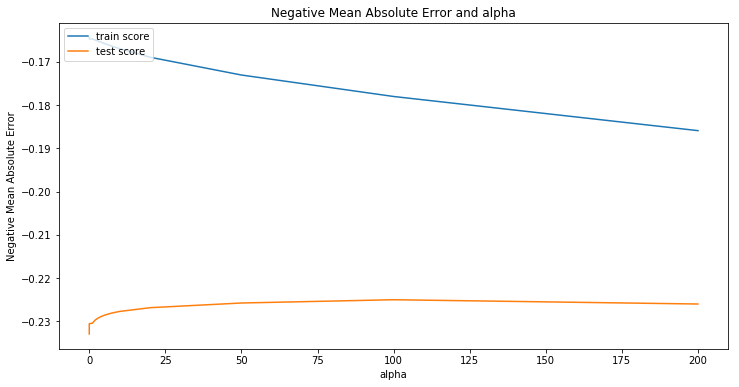

In [78]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.figure(figsize=(12, 6))
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [79]:
model_cv.best_params_

{'alpha': 100}

In [80]:
alpha = 100
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
ridge.coef_

array([-0.02737713,  0.06637991, -0.00738063,  0.0236534 ,  0.14224291,
        0.08469681,  0.0789604 ,  0.05803363,  0.00225242, -0.01436669,
        0.01438828, -0.03914928,  0.0128977 , -0.01124187, -0.01203001,
        0.05453401, -0.00625034, -0.00701729,  0.10509047, -0.02981708,
        0.03795266,  0.06886547,  0.0716153 ,  0.14830491,  0.02890514,
        0.03721209,  0.03462957,  0.01941909, -0.03255499,  0.01736655,
        0.05991862,  0.00230681, -0.01017435,  0.05118501,  0.05651485,
       -0.0019661 ,  0.01279142,  0.02729532,  0.0260109 ,  0.0058052 ,
        0.0005234 ,  0.02724865,  0.0085769 ,  0.02163879, -0.01852007,
       -0.00082814,  0.02219219,  0.00533409,  0.02492377, -0.01304648,
        0.00860463, -0.02400194, -0.00601887, -0.00471788, -0.00893415,
       -0.0185204 ,  0.0226415 ,  0.02120079, -0.00419134,  0.04687795,
       -0.04893779, -0.00749943, -0.00094615, -0.05040921, -0.01257942,
       -0.03175618,  0.00379584, -0.0151372 ,  0.02310528,  0.03

### LASSO REGRESSION

In [81]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 31 candidates, totalling 155 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 155 out of 155 | elapsed:    2.3s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 200, 300, 400, 500, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_absolute_error', verbose=1)

In [82]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.151263,0.026625,0.000798,0.000746,0.0001,{'alpha': 0.0001},-0.215327,-0.257866,-0.220508,-0.237394,-0.218549,-0.229914,0.015922,3,-0.166393,-0.159241,-0.164538,-0.163916,-0.168824,-0.164582,0.003170
1,0.028118,0.011690,0.003124,0.006249,0.001,{'alpha': 0.001},-0.204298,-0.256828,-0.215390,-0.231370,-0.214723,-0.224502,0.018327,2,-0.169803,-0.161089,-0.167658,-0.165898,-0.172260,-0.167342,0.003782
2,0.005784,0.007147,0.007047,0.007039,0.01,{'alpha': 0.01},-0.203947,-0.254741,-0.201255,-0.227026,-0.194428,-0.216267,0.022129,1,-0.194041,-0.179324,-0.194910,-0.186804,-0.193045,-0.189625,0.005885
3,0.010769,0.006340,0.000399,0.000798,0.05,{'alpha': 0.05},-0.247698,-0.289689,-0.250274,-0.261036,-0.217202,-0.253174,0.023345,4,-0.243423,-0.228444,-0.248267,-0.243698,-0.249697,-0.242706,0.007546
4,0.012497,0.006248,0.000000,0.000000,0.1,{'alpha': 0.1},-0.280899,-0.322092,-0.301518,-0.299496,-0.253172,-0.291425,0.023149,5,-0.286026,-0.270837,-0.292137,-0.285378,-0.291351,-0.285146,0.007655


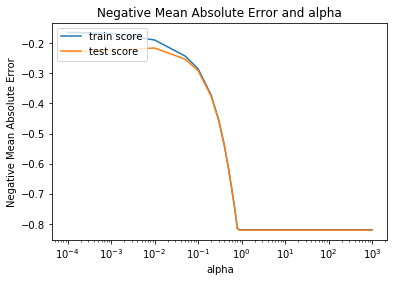

In [83]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xscale('log')
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [84]:
model_cv.best_params_

{'alpha': 0.01}

In [85]:
alpha = 0.01
lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 
lasso.coef_

array([-0.0113884 ,  0.06616627, -0.00723496,  0.01532787,  0.19165942,
        0.09286182,  0.14161204,  0.06136694,  0.        , -0.00203119,
        0.00142665, -0.03103033,  0.01079659, -0.01233864, -0.00059007,
        0.0720269 , -0.        , -0.        ,  0.1081512 , -0.02650275,
        0.0248708 ,  0.        ,  0.        ,  0.31497797,  0.02162924,
        0.00123051,  0.01309005,  0.        , -0.03138019,  0.        ,
        0.0566023 ,  0.        , -0.00237626,  0.06185674,  0.04058241,
        0.        ,  0.        ,  0.02328824,  0.01474974,  0.        ,
        0.        ,  0.00823409, -0.        ,  0.        , -0.04194868,
       -0.        ,  0.00768637,  0.        ,  0.        , -0.        ,
        0.00419527, -0.005185  , -0.        , -0.        , -0.        ,
       -0.00680467,  0.01999217,  0.01850292,  0.        ,  0.04447199,
       -0.02414109, -0.        ,  0.        , -0.02275136, -0.00187973,
       -0.        ,  0.        , -0.        ,  0.00247929,  0.02

### PREDICTIONS ON TRAIN DATASET

#### RIDGE

In [86]:
#TRAIN 
y_pred_train_ridge = ridge.predict(X_train)

In [87]:
#r-squared-train
r2_ridge_train = round(r2_score(y_train,y_pred_train_ridge),3)
print("RIDGE TRAIN R2:",r2_ridge_train)

RIDGE TRAIN R2: 0.936


In [88]:
X_train.shape

(1021, 189)

In [89]:
# adjusted r-squared
#adj_r2 = 1-(1-r2)[(n-1)/(n-k-1)]
n = X_train.shape[0]
k=X_train.shape[1]
adj_r2_ridge = 1-(1-r2_ridge_train)*(n-1)/(n-k-1)
print("RIDGE ADJUSTED R2:",round(adj_r2_ridge,3))

RIDGE ADJUSTED R2: 0.921


- r2 and adjusted r2 are almost equal and difference is less than 5%

#### LASSO

In [90]:
#TRAIN
y_pred_train_lasso = lasso.predict(X_train)
r2_lasso_train = round(r2_score(y_true=y_train,y_pred=y_pred_train_lasso),3)
print("LASSO TRAIN R2:",r2_lasso_train)

LASSO TRAIN R2: 0.926


In [91]:
# adjusted r-squared
#adj_r2 = 1-(1-r2)[(n-1)/(n-k-1)]
n = X_train.shape[0]
k=X_train.shape[1]
adj_r2_lasso = 1-(1-r2_lasso_train)*(n-1)/(n-k-1)
print("LASSO ADJUSTED R2:",round(adj_r2_lasso,3))

LASSO ADJUSTED R2: 0.909


- r2 and adjusted r2 are almost equal and difference is less than 5%

### MODEL EVALUATION - TEST DATASET

In [92]:
#LEts take a look the test dataset
df_test.head()

,MSSubClass,LotArea,LotShape,LandSlope,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,WoodDeckSF,OpenPorchSF,MoSold,YrSold,SalePrice,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NoGarage,PavedDrive_P,PavedDrive_Y,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
892,20,8414.0,3,0,6,8,1963,2003,0.0,3,4,4,4,3,2,663,6,396,1059.0,4,1,1068.0,0.0,1068.0,0,1,0,3,3,6,0,1963.0,2,1,264.0,5,5,192,0.0,2,2006,11.947949,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
1105,60,12256.0,0,0,8,5,1994,1995,362.0,2,4,0,4,0,2,1032,6,431,1463.0,0,1,1500.0,1122.0,2466.1,1,2,1,3,2,9,2,1994.0,2,2,712.0,5,5,186,32.0,4,2010,12.691580,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
413,30,8960.0,3,0,5,6,1927,1950,0.0,3,4,4,4,3,6,0,6,1008,1008

In [93]:
#Scaling test dataset
df_test[columns] = scaler.transform(df_test[columns])

In [94]:
#test dataset after scaling
df_test.head()

,MSSubClass,LotArea,LotShape,LandSlope,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,WoodDeckSF,OpenPorchSF,MoSold,YrSold,SalePrice,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NoGarage,PavedDrive_P,PavedDrive_Y,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
892,-0.897455,-0.384156,0.765292,-0.231319,-0.080267,2.418129,-0.291963,0.887525,-0.673298,0.660651,0.366380,1.009924,0.334118,0.591420,-0.497013,0.559962,0.332052,-0.391275,0.006786,1.429894,0.281569,-0.273026,-0.824309,-0.983837,-0.835964,-1.130937,-0.766726,0.144165,0.802515,-0.346637,-0.950407,0.200808,0.107932,-1.074422,-1.051364,0.31271,0.295322,0.900433,-0.827854,-1.731838,-1.367952,-0.226502,-0.209684,-0.113564,0.516478,-0.423065,0.062715,-0.173990,-0.155152,0.318437,-0.031311,-0.281569,-0.188406,-0.054286,0.663367,-0.031311,-0.109055,-0.204540,-0.137703,-0.345713,-0.196614,-0.289593,-0.231654,-0.155152,-0.099454,-0.185601,-0.423065,-0.076885,-0.236311,-0.167921,-0.226921,-0.295511,-0.126176,4.502314,-0.196614,-0.243164,-0.141351,-0.164812,-0.088867,-0.243164,0.405211,-0.076885,-0.11791,-0.094304,-0.126176,-0.031311,-0.070152,-0.054286,0.094304,0.0,-0.044302,-0.031311,-0.031311,0.0,-0.155152,-0.191176,-0.170979,-0.289593,-0.10436,1.01

In [95]:
#Splitting test dataset into X & y
y_test = df_test.pop('SalePrice')
X_test = df_test

In [96]:
X_test.shape

(438, 189)

#### RIDGE

In [97]:
# predictions on test set
y_pred_test_ridge = ridge.predict(X_test)

In [98]:
#r-squared-test
r2_ridge_test = round(r2_score(y_test,y_pred_test_ridge),3)
print("RIDGE TEST R2:",r2_ridge_test)

RIDGE TEST R2: 0.913


In [99]:
print("RIDGE TRAIN R2:",r2_ridge_train)

RIDGE TRAIN R2: 0.936


- Train and test r2 are very near and difference is less than 5%. HEnce the fit is not overfit or underfit

#### LASSO

In [100]:
# predictions on test set
y_pred_test_lasso = lasso.predict(X_test)

In [101]:
#r-squared-test
r2_lasso_test = round(r2_score(y_test,y_pred_test_lasso),3)
print("LASSO TEST R2:",r2_lasso_test)

LASSO TEST R2: 0.921


In [102]:
print("LASSO TRAIN R2:",r2_lasso_train)

LASSO TRAIN R2: 0.926


- Train and test r2 are very near and difference is less than 5%. HEnce the fit is not overfit or underfit

#### <font color = red>WITHOUT RFE, BEST RIDGE ALPHA IS 100 & BEST LASSO ALPHA IS 0.01 </font>

######  Lasso and ridge regression gives almost same result.
##### Difference in r-squared for train and test set for bot ridge and lasso is less than 5% 
##### Both ridge and lasso explains more than 90% variance in the data
#### Lasso seems better than ridge as its more simpler than ridge and additionally perform feature selection
### Lets try to model with RFE, to make the model computationally less intensive

## MODEL WITH RFE
   - As there are 190 columns, performing ridge and lasso will be tedious and computationally intensive. LEts use RFE and select and select top 75 features and then proceed with ridge and lasso

In [103]:
len(X_train.columns)

189

In [104]:
#Running RFE with output no of variables which is equal to 75
lm = LinearRegression()
lm.fit(X_train,y_train)
rfe = RFE(lm,75)
rfe = rfe.fit(X_train,y_train)

In [105]:
col_rfe = X_train.columns[rfe.support_]
col_rfe

Index(['MSSubClass', 'LotArea', 'LandSlope', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'BsmtQual', 'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC', 'CentralAir', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'KitchenQual', 'Fireplaces', 'GarageCars', 'GarageArea', 'OpenPorchSF', 'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM', 'Neighborhood_BrkSide', 'Neighborhood_CollgCr', 'Neighborhood_Crawfor', 'Neighborhood_Edwards', 'Neighborhood_MeadowV', 'Neighborhood_Mitchel', 'Neighborhood_NAmes', 'Neighborhood_NWAmes', 'Neighborhood_SawyerW', 'Condition1_Norm', 'Condition1_PosN', 'Condition2_PosN', 'BldgType_Duplex', 'BldgType_TwnhsE', 'HouseStyle_SFoyer', 'HouseStyle_SLvl', 'RoofStyle_Gable', 'RoofStyle_Hip', 'RoofMatl_CompShg', 'RoofMatl_Metal', 'RoofMatl_Roll', 'RoofMatl_Tar&Grv', 'RoofMatl_WdShake', 'RoofMatl_WdShngl', 'Exterior1st_CemntBd', 'Exterior1st_HdBoard', 'Exterior1st_Plywood', 'Exterior1st_Wd Sdng', 'Exterior1st_WdShing', 'Exterior2nd_CmentBd',
       'Exterior2nd

In [106]:
# Creating X_train & X_test dataframe with RFE selected variables
X_train = X_train[col_rfe]

In [107]:
X_train.shape

(1021, 75)

In [108]:
len(X_train.columns)

75

### RIDGE REGRESSION

In [109]:
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100,200,300,400, 500, 1000 ]}


ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 31 candidates, totalling 155 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 155 out of 155 | elapsed:    0.9s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 200, 300, 400, 500, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_absolute_error', verbose=1)

In [110]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=200]
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.005786,0.000985,0.001995,0.000892,0.0001,{'alpha': 0.0001},-0.200879,-0.253449,-0.195859,-0.205679,-0.197250,-0.210614,0.021672,24,-0.183404,-0.174523,-0.184318,-0.182277,-0.187025,-0.182310,0.004198
1,0.002189,0.001927,0.000797,0.000746,0.001,{'alpha': 0.001},-0.200879,-0.253448,-0.195859,-0.205679,-0.197249,-0.210613,0.021672,23,-0.183404,-0.174523,-0.184318,-0.182277,-0.187025,-0.182309,0.004198
2,0.006250,0.007654,0.000000,0.000000,0.01,{'alpha': 0.01},-0.200875,-0.253446,-0.195859,-0.205674,-0.197240,-0.210609,0.021673,22,-0.183403,-0.174522,-0.184318,-0.182277,-0.187025,-0.182309,0.004198
3,0.000000,0.000000,0.006249,0.007653,0.05,{'alpha': 0.05},-0.200858,-0.253436,-0.195858,-0.205656,-0.197203,-0.210593,0.021676,21,-0.183399,-0.174520,-0.184320,-0.182277,-0.187023,-0.182308,0.004198
4,0.006248,0.007652,0.000000,0.000000,0.1,{'alpha': 0.1},-0.200837,-0.253423,-0.195857,-0.205633,-0.197157,-0.210572,0.021680,20,-0.183393,-0.174517,-0.184322,-0.182277,-0.187021,-0.182306,0.004199


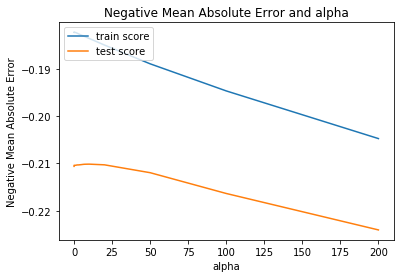

In [111]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [112]:
model_cv.best_params_

{'alpha': 10.0}

In [113]:
alpha = 10
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
ridge.coef_

array([-0.07548531,  0.08000407,  0.02892499,  0.17412259,  0.09790915,
        0.17791695,  0.05716862, -0.04316285, -0.08838806,  0.20397014,
       -0.02881185,  0.03293648,  0.06886683,  0.2934935 ,  0.02781759,
       -0.03198537,  0.05882479,  0.03971762,  0.06894049,  0.02340801,
        0.05767822,  0.02903678,  0.07467921,  0.00548578,  0.03419899,
       -0.02746284,  0.04295957, -0.04971994, -0.04998455, -0.02613372,
       -0.04133438, -0.03097537, -0.02570612,  0.05502245,  0.02991634,
       -0.05470669, -0.03469217,  0.05114062,  0.02542824,  0.02603311,
       -0.03984752, -0.03500908,  0.24322713,  0.05184223,  0.0593295 ,
        0.17872276,  0.10130515,  0.13158571, -0.04154217, -0.06017949,
       -0.04523698, -0.10166563, -0.03020403,  0.03374811, -0.03798357,
       -0.0615928 ,  0.05875103, -0.02796849, -0.02455301,  0.05567528,
        0.04688714,  0.02987873,  0.03441329, -0.02755476, -0.03837396,
        0.05755745,  0.10415017,  0.01925518,  0.03826199,  0.00

### LASSO REGRESSION

In [114]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 31 candidates, totalling 155 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 155 out of 155 | elapsed:    1.1s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 200, 300, 400, 500, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_absolute_error', verbose=1)

In [115]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.031588,0.006373,0.004321,0.005807,0.0001,{'alpha': 0.0001},-0.200567,-0.253562,-0.195806,-0.205519,-0.197243,-0.210529,0.021761,1,-0.183309,-0.174580,-0.184326,-0.182238,-0.186968,-0.182284,0.004159
1,0.009308,0.005256,0.001685,0.001511,0.001,{'alpha': 0.001},-0.198823,-0.254918,-0.196233,-0.207905,-0.198900,-0.211344,0.022131,2,-0.184816,-0.175841,-0.186079,-0.184002,-0.188164,-0.183780,0.004211
2,0.005585,0.000797,0.001396,0.000488,0.01,{'alpha': 0.01},-0.213040,-0.262922,-0.203109,-0.224474,-0.194388,-0.219580,0.023869,3,-0.202150,-0.189586,-0.207593,-0.200718,-0.207990,-0.201607,0.006666
3,0.004585,0.001198,0.001199,0.000398,0.05,{'alpha': 0.05},-0.254442,-0.298226,-0.254572,-0.262354,-0.225234,-0.258961,0.023358,4,-0.248427,-0.236289,-0.255138,-0.250807,-0.256507,-0.249434,0.007187
4,0.005984,0.001093,0.002394,0.001352,0.1,{'alpha': 0.1},-0.288181,-0.330115,-0.310707,-0.303754,-0.259836,-0.298509,0.023560,5,-0.292726,-0.278527,-0.297441,-0.293425,-0.298951,-0.292214,0.007236


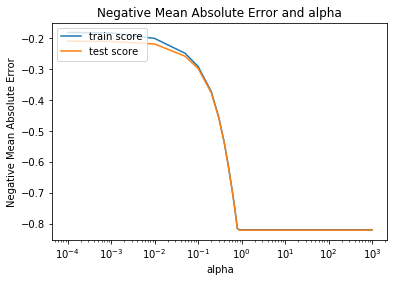

In [116]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xscale('log')
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [117]:
model_cv.best_params_

{'alpha': 0.0001}

In [118]:
alpha = 0.0001
lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 
lasso.coef_

array([-0.0791502 ,  0.08002051,  0.02784173,  0.17069089,  0.10073334,
        0.19128483,  0.0555598 , -0.03955301, -0.0932586 ,  0.20947323,
       -0.02769971,  0.02855511,  0.07039148,  0.30288195,  0.02550286,
       -0.03082203,  0.05806589,  0.03308644,  0.07628614,  0.02388057,
        0.07834076,  0.04287889,  0.11797252,  0.04625201,  0.0358515 ,
       -0.0280851 ,  0.04457416, -0.0479354 , -0.05011397, -0.0251451 ,
       -0.04300328, -0.03243012, -0.02672675,  0.05348895,  0.0286166 ,
       -0.0556655 , -0.03561625,  0.05429324,  0.02699528,  0.02758339,
       -0.03761128, -0.03287137,  0.33808081,  0.0749882 ,  0.08120489,
        0.24658433,  0.14049708,  0.1757789 , -0.05290065, -0.06875632,
       -0.05216234, -0.11253173, -0.0333179 ,  0.03893909, -0.0434821 ,
       -0.07459819,  0.06303632, -0.03082085, -0.02548328,  0.06672414,
        0.05550844,  0.03461744,  0.03914894, -0.02706566, -0.04044725,
        0.05908497,  0.22054883,  0.04602085,  0.09397702,  0.02

### PREDICTIONS ON TRAIN DATASET

#### RIDGE

In [119]:
#TRAIN 
y_pred_train_ridge = ridge.predict(X_train)

In [120]:
#r-squared-train
r2_ridge_train = round(r2_score(y_train,y_pred_train_ridge),3)
print("RIDGE TRAIN R2:",r2_ridge_train)

RIDGE TRAIN R2: 0.935


In [121]:
X_train.shape

(1021, 75)

In [122]:
# adjusted r-squared
#adj_r2 = 1-(1-r2)[(n-1)/(n-k-1)]
n = X_train.shape[0]
k=X_train.shape[1]
adj_r2_ridge = 1-(1-r2_ridge_train)*(n-1)/(n-k-1)
print("RIDGE ADJUSTED R2:",round(adj_r2_ridge,3))

RIDGE ADJUSTED R2: 0.93


- r2 and adjusted r2 are almost equal and difference is less than 5%

#### LASSO

In [123]:
#TRAIN
y_pred_train_lasso = lasso.predict(X_train)
r2_lasso_train = round(r2_score(y_true=y_train,y_pred=y_pred_train_lasso),3)
print("LASSO TRAIN R2:",r2_lasso_train)

LASSO TRAIN R2: 0.936


In [124]:
# adjusted r-squared
#adj_r2 = 1-(1-r2)[(n-1)/(n-k-1)]
n = X_train.shape[0]
k=X_train.shape[1]
adj_r2_lasso = 1-(1-r2_lasso_train)*(n-1)/(n-k-1)
print("LASSO ADJUSTED R2:",round(adj_r2_lasso,3))

LASSO ADJUSTED R2: 0.931


- r2 and adjusted r2 are almost equal and difference is less than 5%

### MODEL EVALUATION - TEST DATASET

In [125]:
#LEts take a look the test dataset
df_test.head()

,MSSubClass,LotArea,LotShape,LandSlope,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,WoodDeckSF,OpenPorchSF,MoSold,YrSold,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NoGarage,PavedDrive_P,PavedDrive_Y,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
892,-0.897455,-0.384156,0.765292,-0.231319,-0.080267,2.418129,-0.291963,0.887525,-0.673298,0.660651,0.366380,1.009924,0.334118,0.591420,-0.497013,0.559962,0.332052,-0.391275,0.006786,1.429894,0.281569,-0.273026,-0.824309,-0.983837,-0.835964,-1.130937,-0.766726,0.144165,0.802515,-0.346637,-0.950407,0.200808,0.107932,-1.074422,-1.051364,0.31271,0.295322,0.900433,-0.827854,-1.731838,-1.367952,-0.209684,-0.113564,0.516478,-0.423065,0.062715,-0.173990,-0.155152,0.318437,-0.031311,-0.281569,-0.188406,-0.054286,0.663367,-0.031311,-0.109055,-0.204540,-0.137703,-0.345713,-0.196614,-0.289593,-0.231654,-0.155152,-0.099454,-0.185601,-0.423065,-0.076885,-0.236311,-0.167921,-0.226921,-0.295511,-0.126176,4.502314,-0.196614,-0.243164,-0.141351,-0.164812,-0.088867,-0.243164,0.405211,-0.076885,-0.11791,-0.094304,-0.126176,-0.031311,-0.070152,-0.054286,0.094304,0.0,-0.044302,-0.031311,-0.031311,0.0,-0.155152,-0.191176,-0.170979,-0.289593,-0.10436,1.010832,-0.083086,-0.09

In [126]:
# Creating X_test dataframe with RFE selected variables
X_test = X_test[col_rfe]

In [127]:
X_test.shape

(438, 75)

#### RIDGE

In [128]:
# predictions on test set
y_pred_test_ridge = ridge.predict(X_test)

In [129]:
#r-squared-test
r2_ridge_test = round(r2_score(y_test,y_pred_test_ridge),3)
print("RIDGE TEST R2:",r2_ridge_test)

RIDGE TEST R2: 0.909


In [130]:
print("RIDGE TRAIN R2:",r2_ridge_train)

RIDGE TRAIN R2: 0.935


- Train and test r2 are very near and difference is less than 5%. HEnce the fit is not overfit or underfit

#### LASSO

In [131]:
# predictions on test set
y_pred_test_lasso = lasso.predict(X_test)

In [132]:
#r-squared-test
r2_lasso_test = round(r2_score(y_test,y_pred_test_lasso),3)
print("LASSO TEST R2:",r2_lasso_test)

LASSO TEST R2: 0.9


In [133]:
print("LASSO TRAIN R2:",r2_lasso_train)

LASSO TRAIN R2: 0.936


- Train and test r2 are very near and difference is less than 5%. HEnce the fit is not overfit or underfit

######  Lasso and ridge regression gives almost same result.
##### Difference in r-squared for train and test set for bot ridge and lasso is less than 5% 
##### Both ridge and lasso explains more than 90% variance in the data
#### We can opt for lasso, as lasso model is simpler and does feature selection compared to ridge

##### <font color = green>Model with RFE and without RFE results are almost same, with r2 value differences not more than 5%.
##### <font color = green> test r2 for ridge and lasso without rfe is around 92% & with RFE its 90%.Difference in metrics is very less  
##### <font color = blue> Incase of model with RFE, we feed only rfe selected features  ridge and lasso models. This will make ridge and lasso computationally less intensive because of lesser features,so  we can opt for model with RFE</font>

### <font color = red> Hence i will consider the LASSO MODEL with RFE SELECTED FEATURES AS FINAL MODEL </font>

#### ridge features & co-efficients with rfe:

In [134]:
Features_ridge = list(ridge.coef_)
columns_ridge = df_train.columns
ridge_coef = pd.DataFrame(list(zip(columns_ridge,Features_ridge)))
ridge_coef.columns = ['Ridge_features','Ridge_Coefficients']

In [135]:
# Top 5 variables, RIDGE:
print('RIDGE INTERCEPTS IS',ridge.intercept_)
ridge_coef.sort_values(by='Ridge_Coefficients',ascending=False).head(10)

RIDGE INTERCEPTS IS 2.7482903490503214e-15


,Ridge_features,Ridge_Coefficients
13,BsmtExposure,0.293493
42,MSZoning_RH,0.243227
9,ExterQual,0.203970
45,Street_Pave,0.178723
5,OverallCond,0.177917
3,LandSlope,0.174123
47,LandContour_Low,0.131586
66,Neighborhood_NPkVill,0.104150
46,LandContour_HLS,0.101305
4,OverallQual,0.097909


In [136]:
# Bottom 5 variables, RIDGE:
ridge_coef.sort_values(by='Ridge_Coefficients',ascending=False).tail(10)

,Ridge_features,Ridge_Coefficients
7,YearRemodAdd,-0.043163
50,LotConfig_CulDSac,-0.045237
27,BedroomAbvGr,-0.049720
28,KitchenQual,-0.049985
35,GarageQual,-0.054707
49,Utilities_NoSeWa,-0.060179
55,Neighborhood_BrDale,-0.061593
0,MSSubClass,-0.075485
8,MasVnrArea,-0.088388
51,LotConfig_FR2,-0.101666


#### Lasso features & co-efficients with rfe - FINAL MODEL:

In [137]:
Features_lasso = list(lasso.coef_)
columns_lasso = df_train.columns
lasso_coef = pd.DataFrame(list(zip(columns_lasso,Features_lasso)))
lasso_coef.columns = ['Lasso_features','Lasso_Coefficients']

In [138]:
# Top 5 variables, Lasso:
print('LASSO INTERCEPTS IS',lasso.intercept_)
lasso_coef.sort_values(by='Lasso_Coefficients',ascending=False).head(10)

LASSO INTERCEPTS IS 2.760510588338984e-15


,Lasso_features,Lasso_Coefficients
42,MSZoning_RH,0.338081
13,BsmtExposure,0.302882
45,Street_Pave,0.246584
66,Neighborhood_NPkVill,0.220549
9,ExterQual,0.209473
5,OverallCond,0.191285
47,LandContour_Low,0.175779
70,Neighborhood_OldTown,0.171300
3,LandSlope,0.170691
46,LandContour_HLS,0.140497


In [139]:
# Bottom 5 variables, Lasso:
lasso_coef.sort_values(by='Lasso_Coefficients',ascending=False).tail(10)

,Lasso_features,Lasso_Coefficients
27,BedroomAbvGr,-0.047935
28,KitchenQual,-0.050114
50,LotConfig_CulDSac,-0.052162
48,LandContour_Lvl,-0.052901
35,GarageQual,-0.055666
49,Utilities_NoSeWa,-0.068756
55,Neighborhood_BrDale,-0.074598
0,MSSubClass,-0.079150
8,MasVnrArea,-0.093259
51,LotConfig_FR2,-0.112532


In [140]:
lasso_coef.shape

(75, 2)

#### <font color = red>WITH RFE, BEST RIDGE ALPHA IS 10 & BEST LASSO ALPHA IS 0.0001 </font>

- TOP 5 predictor variables:
    - MSZoning_RH
    - BsmtExposure
    - Street_Pave
    - ExterQual
    - OverallCond
    - Neighborhood_NPkVill
    - LandSlope
- BOTTOM 5 predictor variables:
    - BedroomAbvGr
    - KitchenQual
    - LotConfig_CulDSac
    - Utilities_NoSeWa
    - GarageQual

#### INFERENCES:
- Houses with zoning classification as residential high density impacts the sale price of the house more. They have higher sale price
- basement exposure and better external quality of the house also influence the sale price of the house
- Houses which have street pavement & neighbourhood as northpark villa also impact the sale price positively
- Houses with bedrooms above grade, kitchen quality and garage quality of the house influences the saleproce negatively
- Houses with LotConfig_CulDSac & utilities as Electricity and Gas Only also affects the sale price negatively

#### ----END----